# Resume Project 1
- ## Heart Disease Analysis

Extensive Analysis + Visualization with Python

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
heart = pd.read_csv(r"C:\Users\umesh\Downloads\heart.csv")
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
heart.shape

(303, 14)

In [8]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


- The dataset contains several columns which are as follows -

    - age : age in years
    - sex : (1 = male; 0 = female)
    - cp : chest pain type
    - trestbps : resting blood pressure (in mm Hg on admission to the hospital)
    - chol : serum cholestoral in mg/dl
    - fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - restecg : resting electrocardiographic results
    - thalach : maximum heart rate achieved
    - exang : exercise induced angina (1 = yes; 0 = no)
    - oldpeak : ST depression induced by exercise relative to rest
    - slope : the slope of the peak exercise ST segment
    - ca : number of major vessels (0-3) colored by flourosopy
    - thal : 3 = normal; 6 = fixed defect; 7 = reversable defect
    - target : 1 or 0

In [13]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [15]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [19]:
heart.describe(include = 'all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [21]:
heart['target'].nunique()

2

In [23]:
heart['target'].unique()

array([1, 0])

In [25]:
heart['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

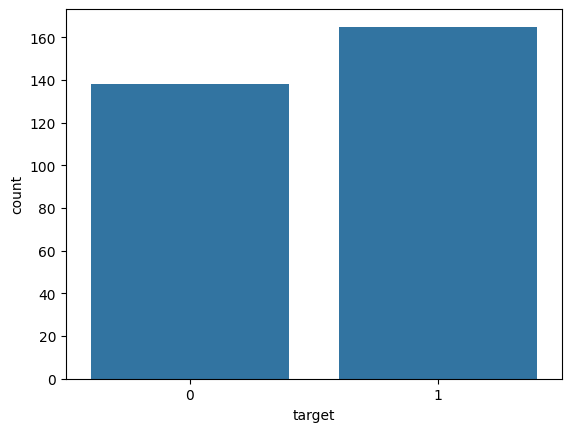

In [27]:
ax = sns.countplot(data = heart, x = 'target')
plt.show()

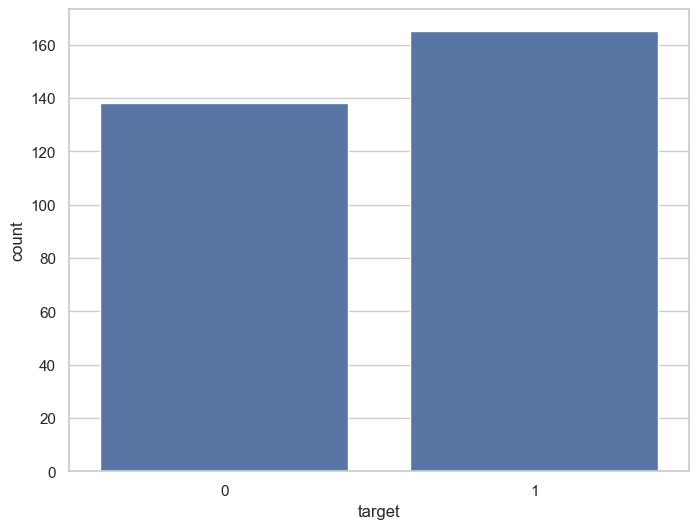

In [29]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize = (8, 6))
ax = sns.countplot(data = heart, x = 'target')
plt.show()

In [31]:
heart.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: count, dtype: int64

In [33]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [35]:
heart.groupby('sex')['fbs'].value_counts()

sex  fbs
0    0       84
     1       12
1    0      174
     1       33
Name: count, dtype: int64

In [37]:
heart.groupby('sex')['exang'].value_counts()

sex  exang
0    0         74
     1         22
1    0        130
     1         77
Name: count, dtype: int64

In [39]:
heart.groupby('target')['fbs'].value_counts()

target  fbs
0       0      116
        1       22
1       0      142
        1       23
Name: count, dtype: int64

In [41]:
heart.groupby('sex')['age'].value_counts()

sex  age
0    62     7
     58     6
     54     5
     63     5
     41     4
           ..
1    69     2
     29     1
     34     1
     37     1
     77     1
Name: count, Length: 73, dtype: int64

In [43]:
heart['restecg'].value_counts()

restecg
1    152
0    147
2      4
Name: count, dtype: int64

In [45]:
heart.groupby('sex')['restecg'].value_counts()

sex  restecg
0    1           49
     0           44
     2            3
1    0          103
     1          103
     2            1
Name: count, dtype: int64

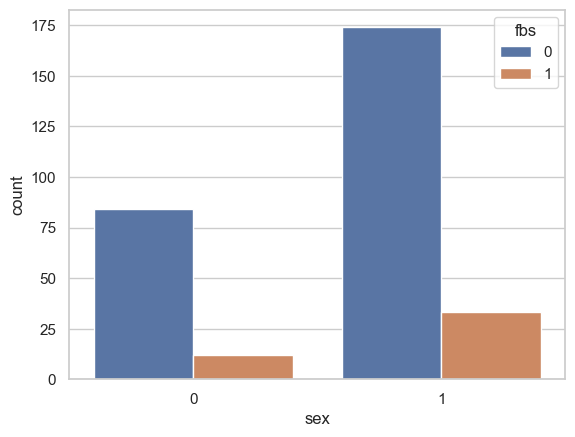

In [47]:
ax = sns.countplot(heart, x = 'sex', hue = 'fbs')
plt.show(ax)

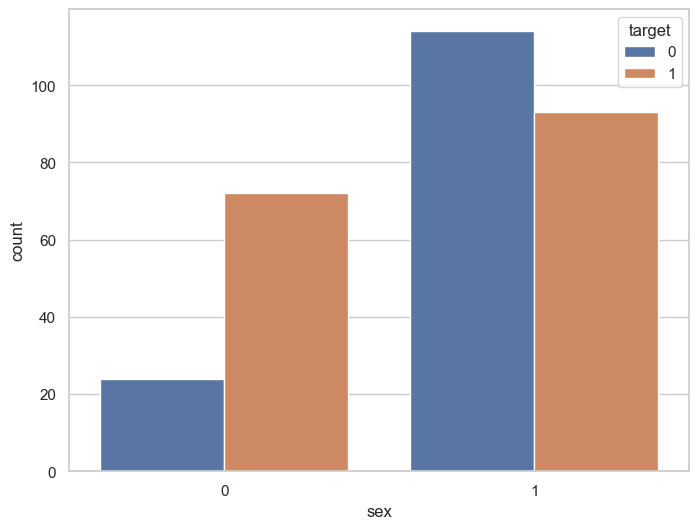

In [49]:
f, ax = plt.subplots(figsize = (8, 6))
ax = sns.countplot(heart, x = 'sex', hue = 'target')
plt.show(ax)

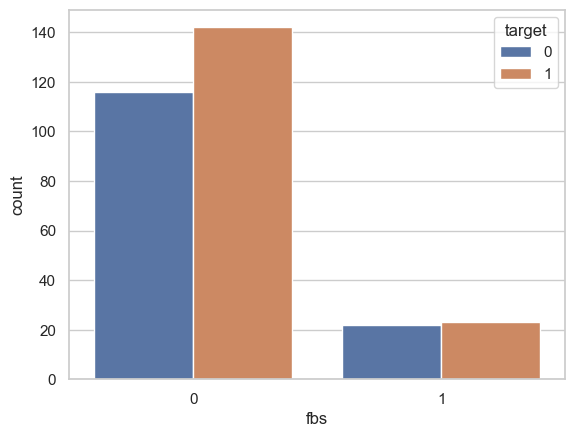

In [51]:
ax = sns.countplot(heart, x = 'fbs', hue = 'target')
plt.show(ax)

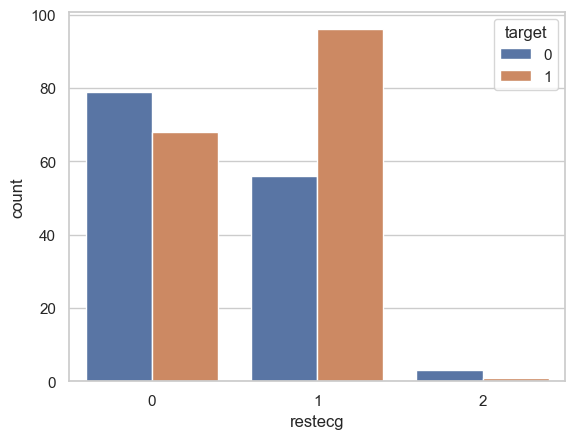

In [53]:
ax = sns.countplot(heart, x = 'restecg', hue = 'target')
plt.show(ax)

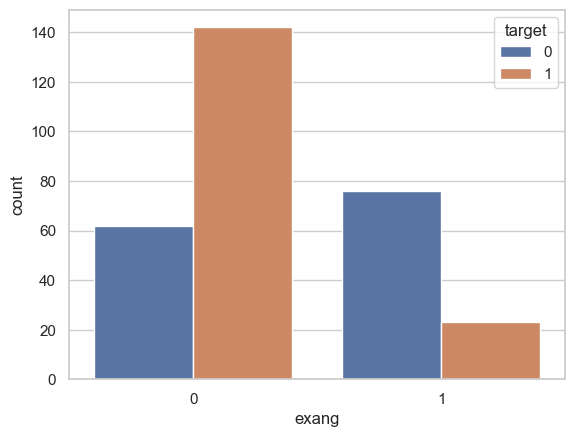

In [55]:
ax = sns.countplot(heart, x = 'exang', hue = 'target')
plt.show(ax)

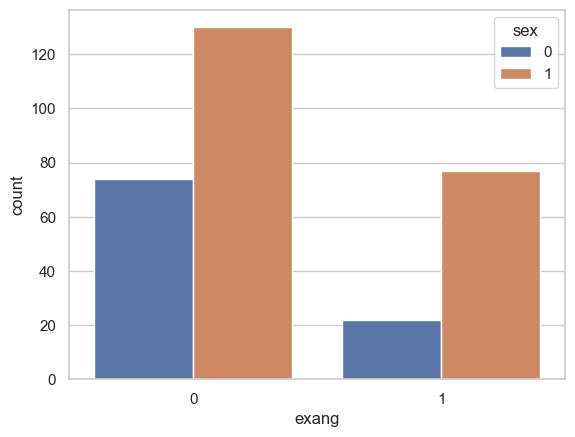

In [57]:
ax = sns.countplot(heart, x = 'exang', hue = 'sex')
plt.show(ax)

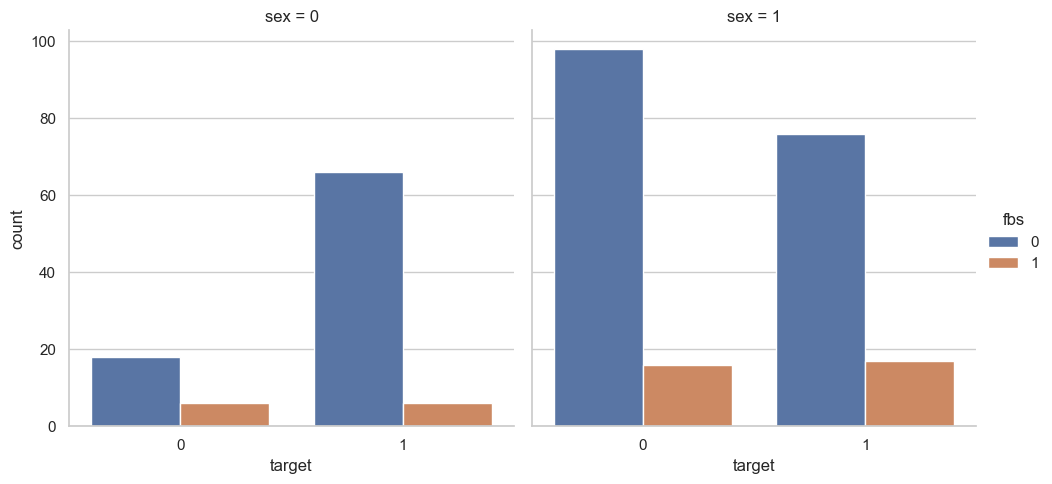

In [59]:
ax = sns.catplot(heart, x = 'target', hue = 'fbs', col = 'sex', kind = 'count')
plt.show(ax)

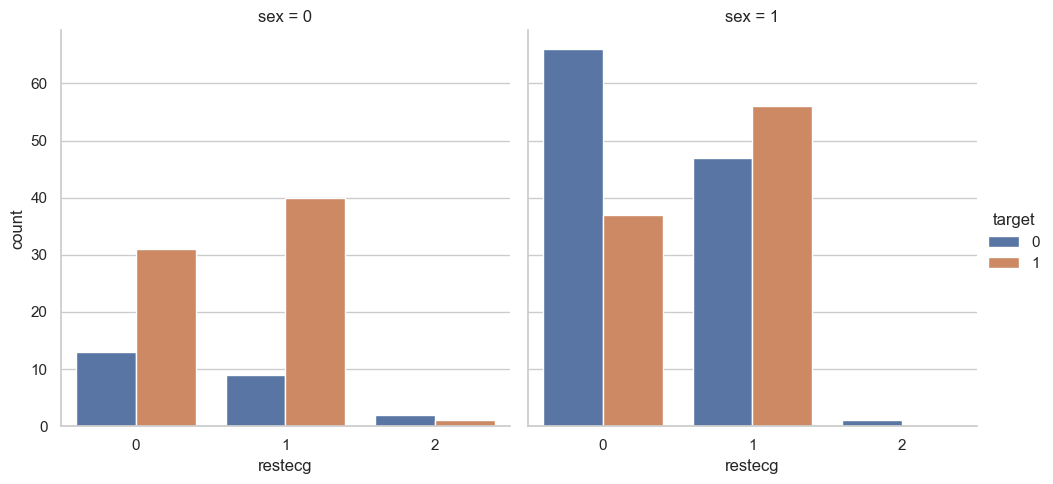

In [61]:
ax = sns.catplot(heart, x = 'restecg', col = 'sex', hue = 'target', kind = 'count')
plt.show(ax)

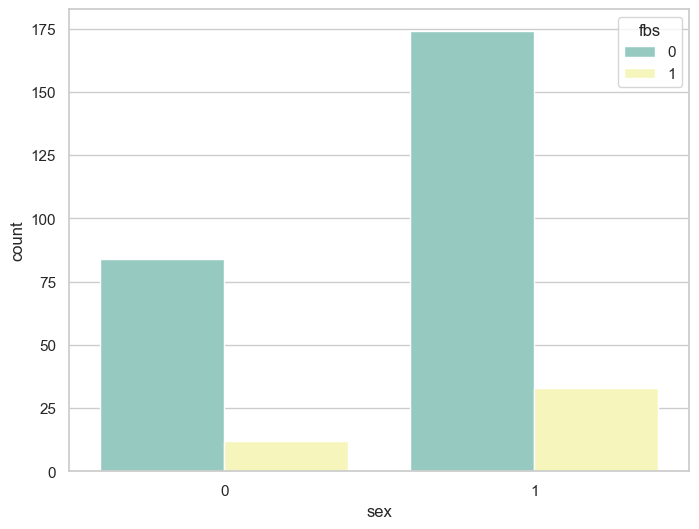

In [63]:
f, ax = plt.subplots(figsize = (8, 6))
ax = sns.countplot(heart, x = 'sex', hue = 'fbs', palette = 'Set3')
plt.show(ax)

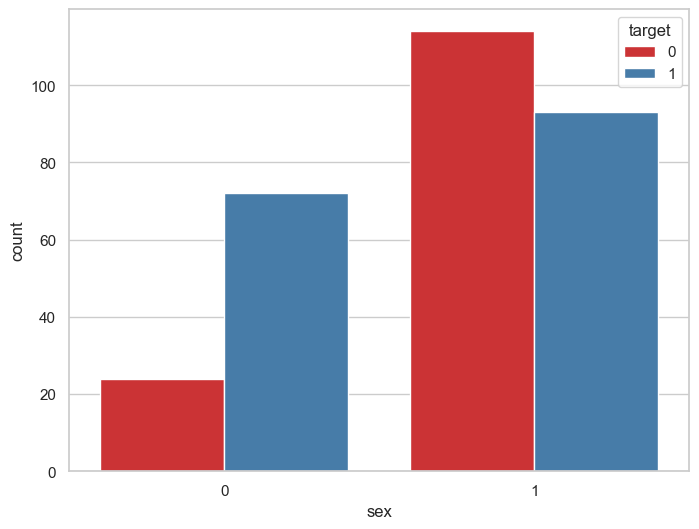

In [65]:
f, ax = plt.subplots(figsize = (8, 6))
ax = sns.countplot(heart, x = 'sex', hue = 'target', palette = 'Set1')
plt.show(ax)

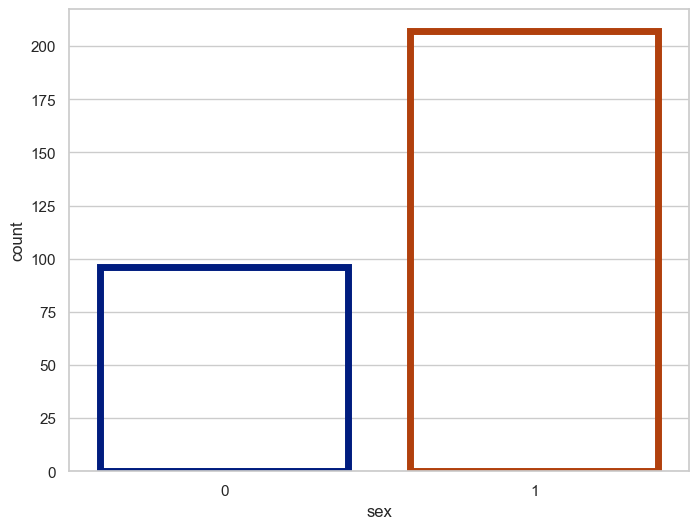

In [67]:
f, ax = plt.subplots(figsize = (8, 6))
ax = sns.countplot(heart, x = 'sex', facecolor = (0, 0, 0, 0), linewidth = 5, edgecolor = sns.color_palette('dark', 3))
plt.show(ax)

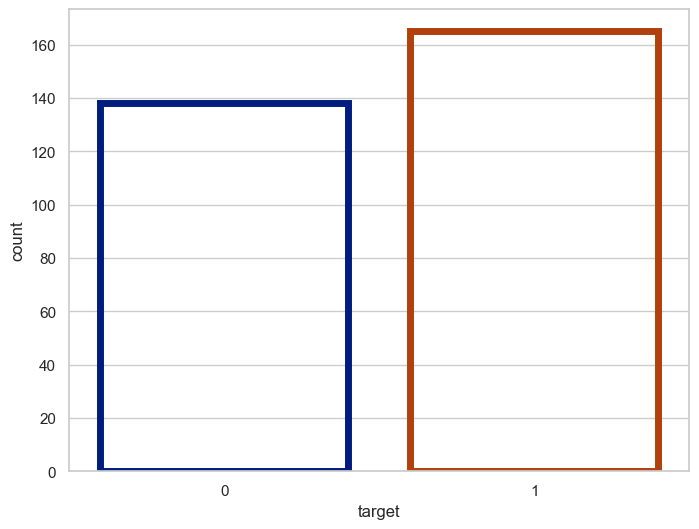

In [69]:
f, ax = plt.subplots(figsize = (8, 6))
ax = sns.countplot(heart, x = 'target', facecolor = (0, 0, 0, 0), linewidth = 5, edgecolor = sns.color_palette('dark', 3))
plt.show(ax)

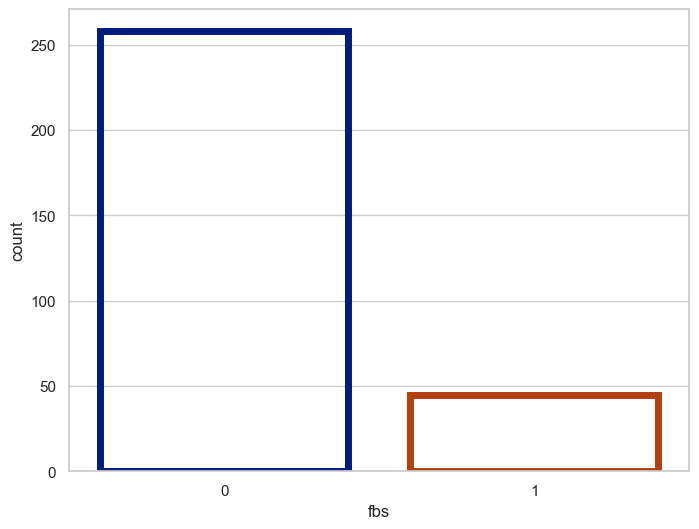

In [71]:
f, ax = plt.subplots(figsize = (8, 6))
ax = sns.countplot(heart, x = 'fbs', facecolor = (0, 0, 0, 0), linewidth = 5, edgecolor = sns.color_palette('dark', 3))
plt.show(ax)

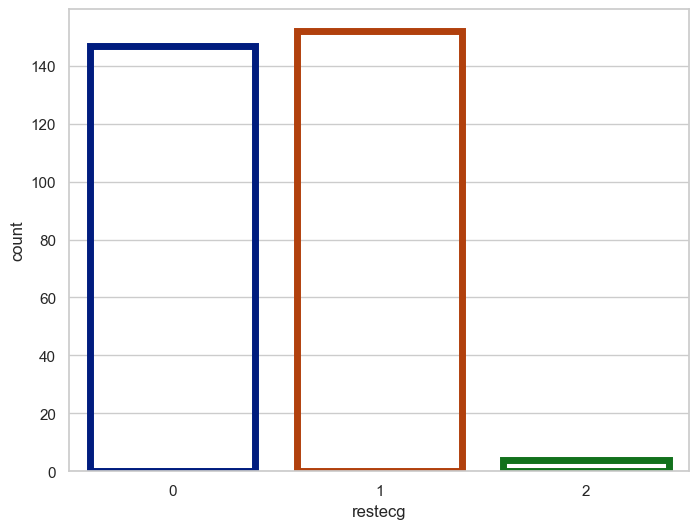

In [73]:
f, ax = plt.subplots(figsize = (8, 6))
ax = sns.countplot(heart, x = 'restecg', facecolor = (0, 0, 0, 0), linewidth = 5, edgecolor = sns.color_palette('dark', 3))
plt.show(ax)

In [75]:
correlation = heart.corr()
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [77]:
correlation['target'].sort_values(ascending = False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [79]:
heart['cp'].nunique()

4

In [81]:
heart['cp'].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [83]:
heart.groupby('sex')['cp'].value_counts()

sex  cp
0    0      39
     2      35
     1      18
     3       4
1    0     104
     2      52
     1      32
     3      19
Name: count, dtype: int64

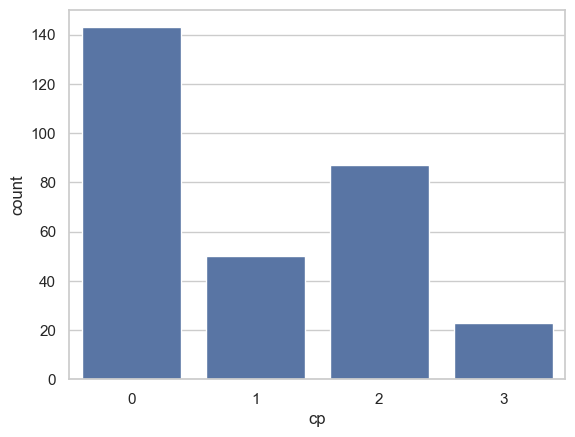

In [85]:
ax = sns.countplot(heart, x = 'cp')
plt.show()

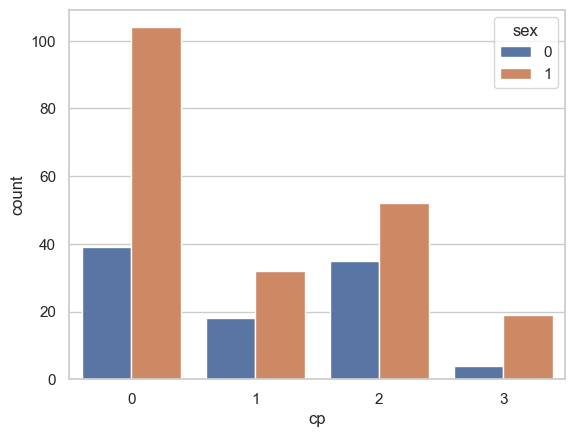

In [87]:
ax = sns.countplot(heart, x = 'cp', hue = 'sex')
plt.show()

In [89]:
heart.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: count, dtype: int64

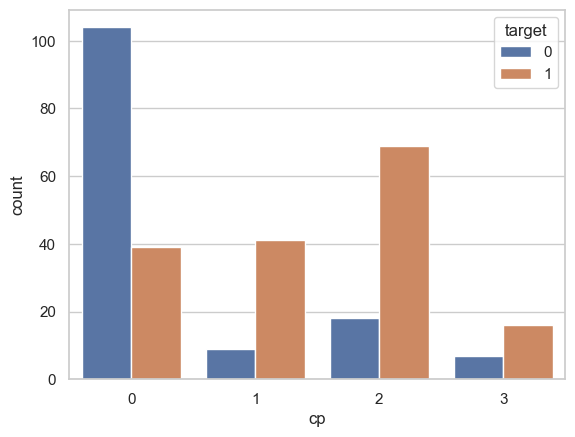

In [91]:
a = sns.countplot(heart, x = 'cp', hue = 'target')
plt.show()

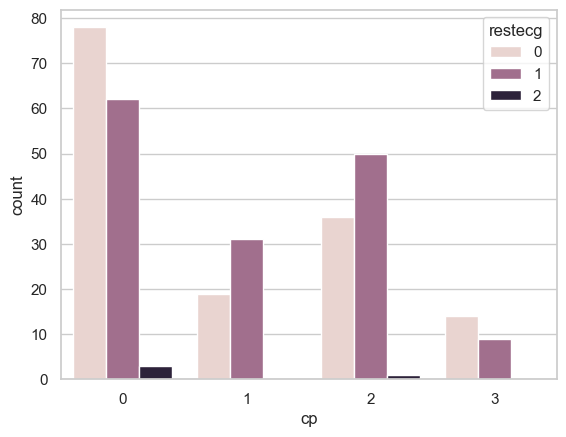

In [93]:
a = sns.countplot(heart, x = 'cp', hue = 'restecg')
plt.show()

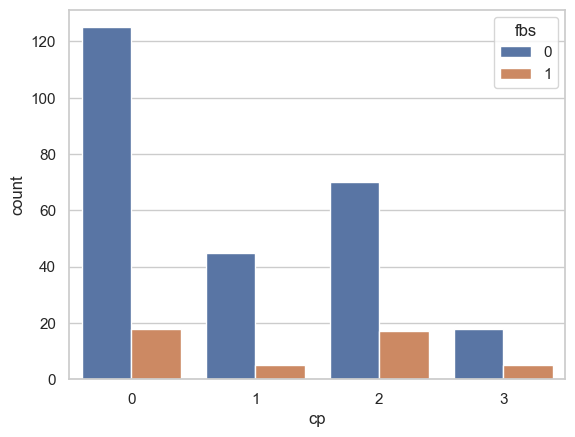

In [95]:
a = sns.countplot(heart, x = 'cp', hue = 'fbs')
plt.show()

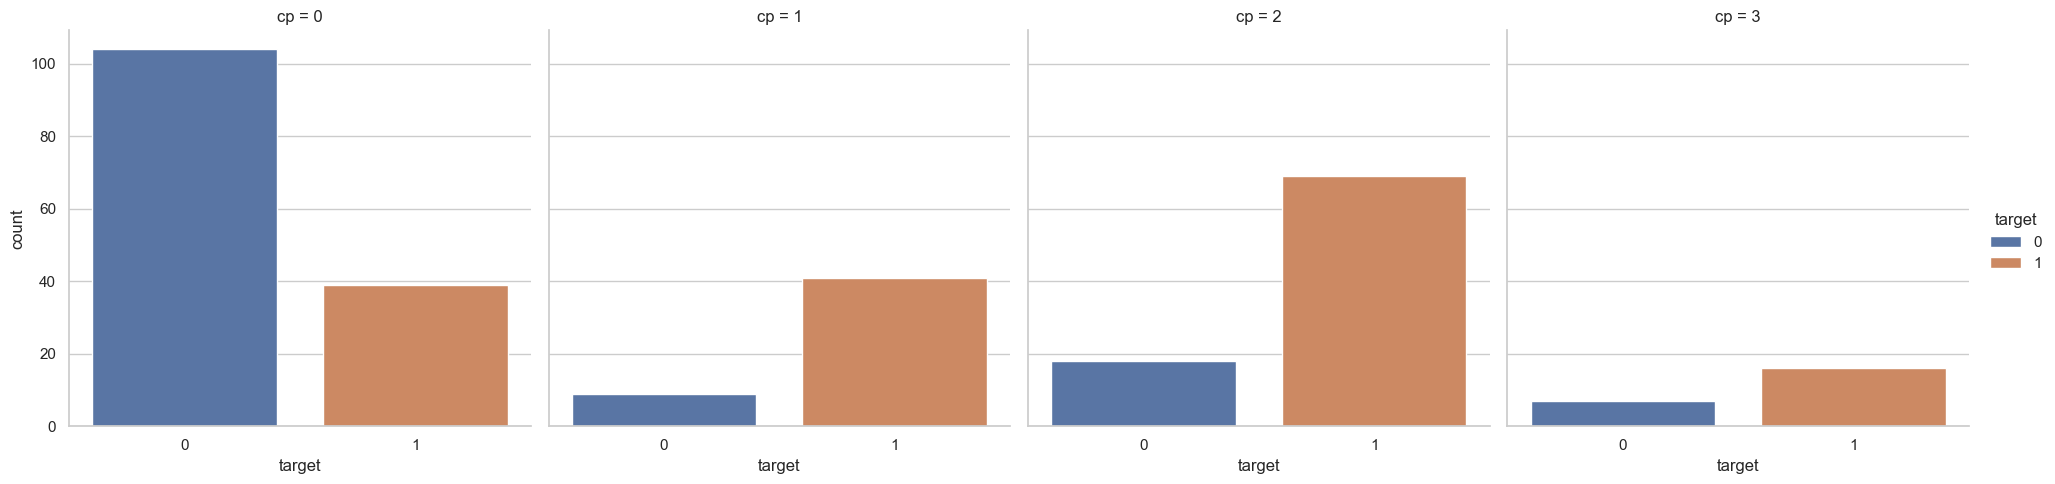

In [97]:
a = sns.catplot(heart, x = 'target', col = 'cp', hue = 'target', kind = 'count')
plt.show()

In [99]:
heart['thalach'].nunique()

91

In [101]:
heart['thalach'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90])

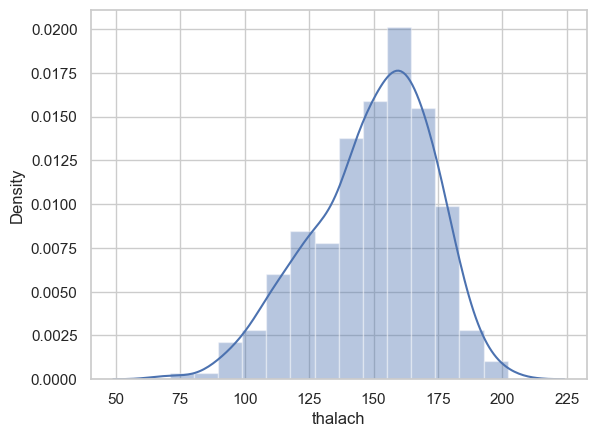

In [103]:
a = heart['thalach']
h = sns.distplot(a)
plt.show()

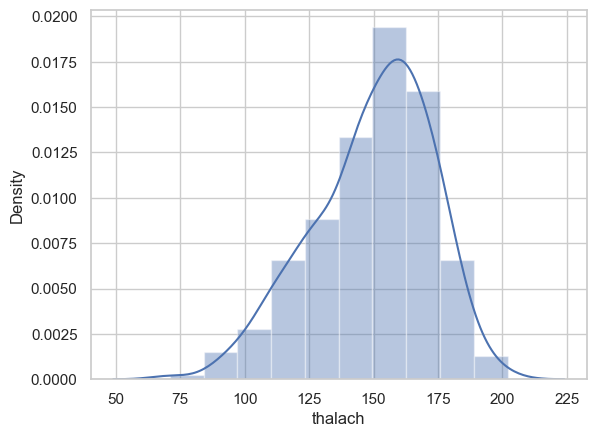

In [105]:
a = heart['thalach']
h = sns.distplot(a, bins = 10)
plt.show()

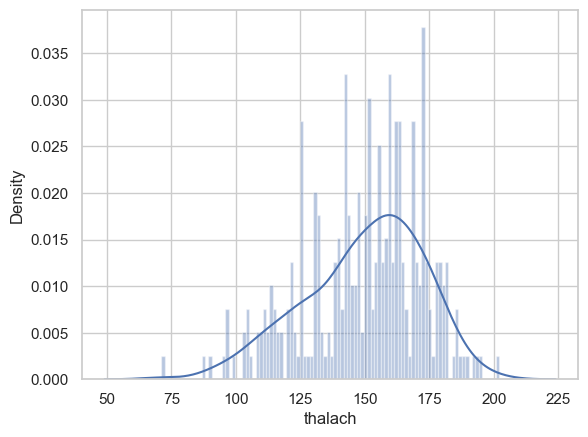

In [107]:
a = heart['thalach']
h = sns.distplot(a, bins = 100)
plt.show()

In [109]:
plt.subplots(figsize = (10, 6))

(<Figure size 1000x600 with 1 Axes>, <Axes: >)

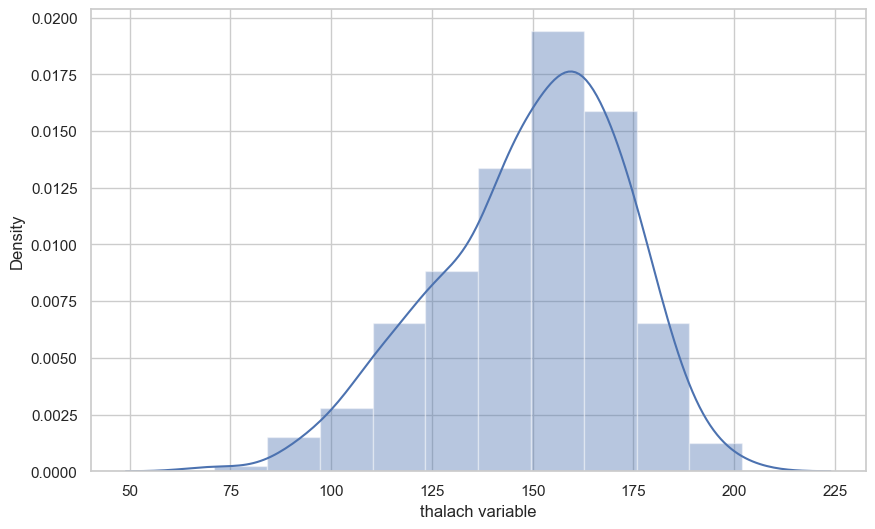

In [111]:
x = heart['thalach']
x = pd.Series(x, name = 'thalach variable')
a = sns.distplot(x, bins = 10)
plt.show()

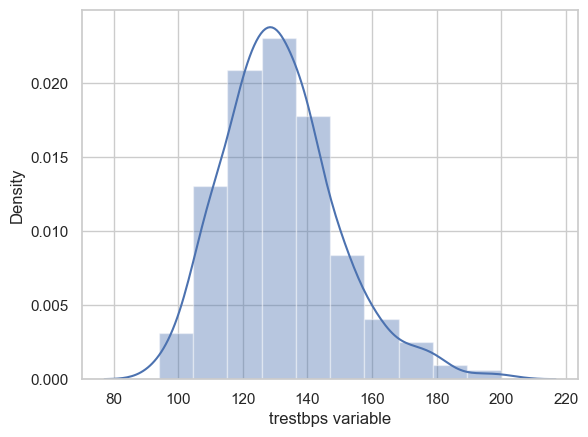

In [113]:
x = heart['trestbps']
x = pd.Series(x, name = 'trestbps variable')
a = sns.distplot(x, bins = 10)
plt.show()

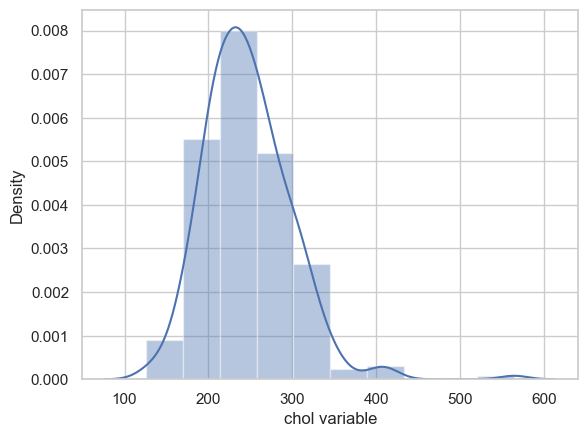

In [115]:
x = heart['chol']
x = pd.Series(x, name = 'chol variable')
a = sns.distplot(x, bins = 10)
plt.show()

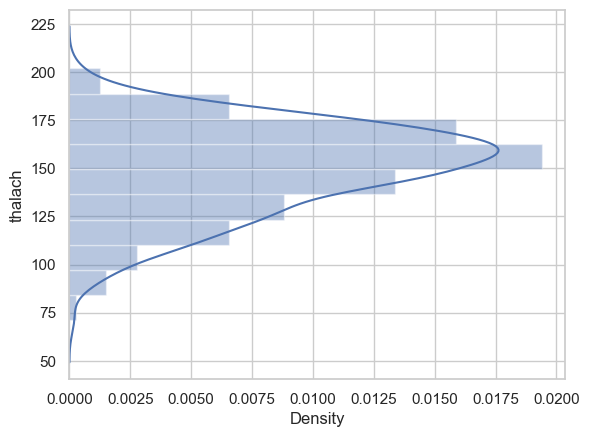

In [117]:
x = heart['thalach']
a = sns.distplot(x, bins = 10, vertical = True)
plt.show()

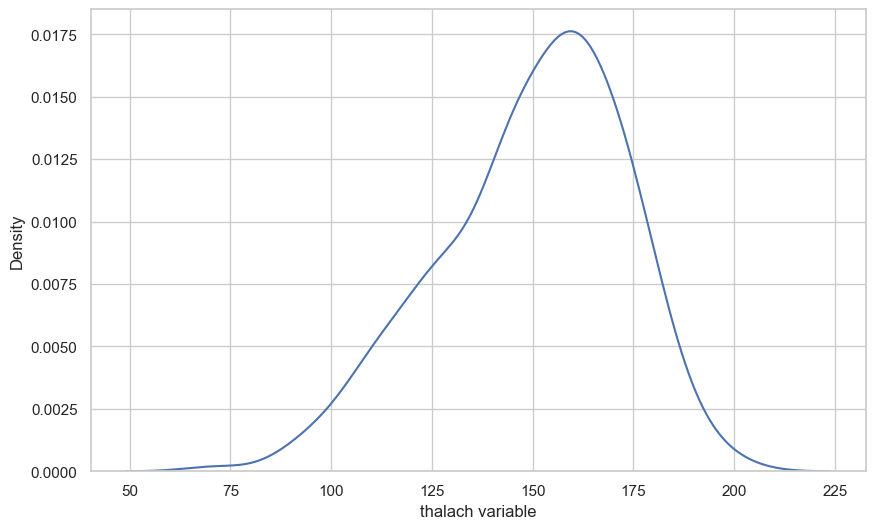

In [119]:
plt.subplots(figsize = (10, 6))
x = heart['thalach']
x = pd.Series(x, name = 'thalach variable')
a = sns.kdeplot(x)
plt.show()

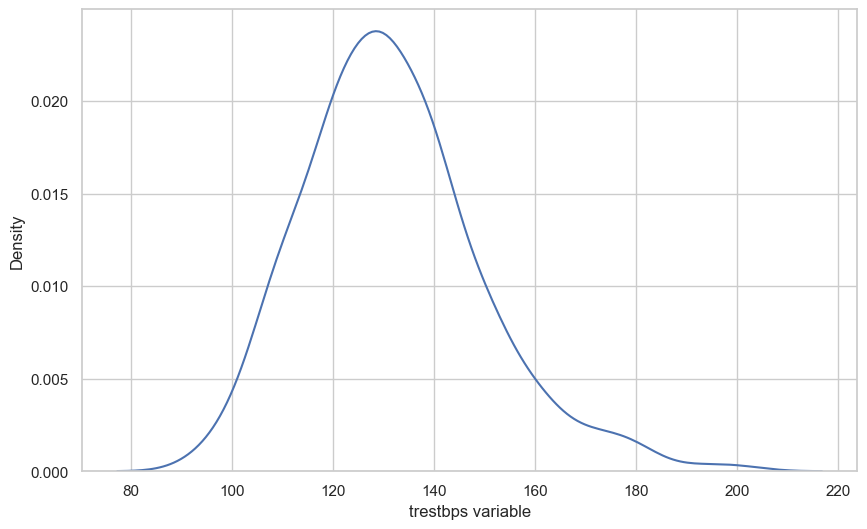

In [121]:
plt.subplots(figsize = (10, 6))
x = heart['trestbps']
x = pd.Series(x, name = 'trestbps variable')
a = sns.kdeplot(x)
plt.show()

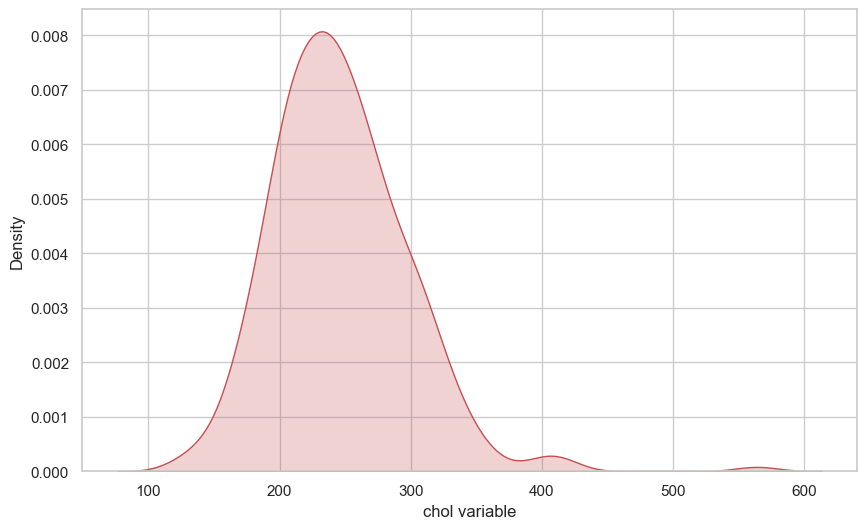

In [123]:
plt.subplots(figsize = (10, 6))
x = heart['chol']
x = pd.Series(x, name = 'chol variable')
a = sns.kdeplot(x, shade = True, color = 'r')
plt.show()

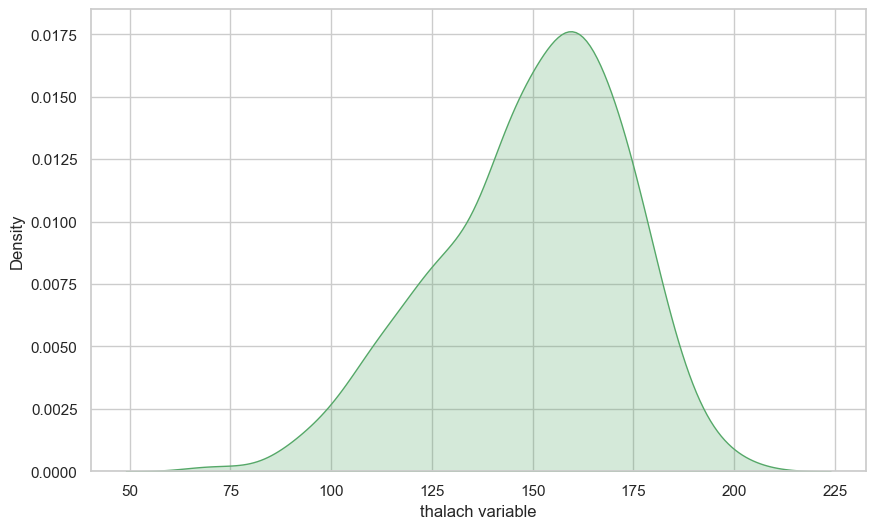

In [125]:
plt.subplots(figsize = (10, 6))
x = heart['thalach']
x = pd.Series(x, name = 'thalach variable')
a = sns.kdeplot(x, shade = True, color = 'g')
plt.show()

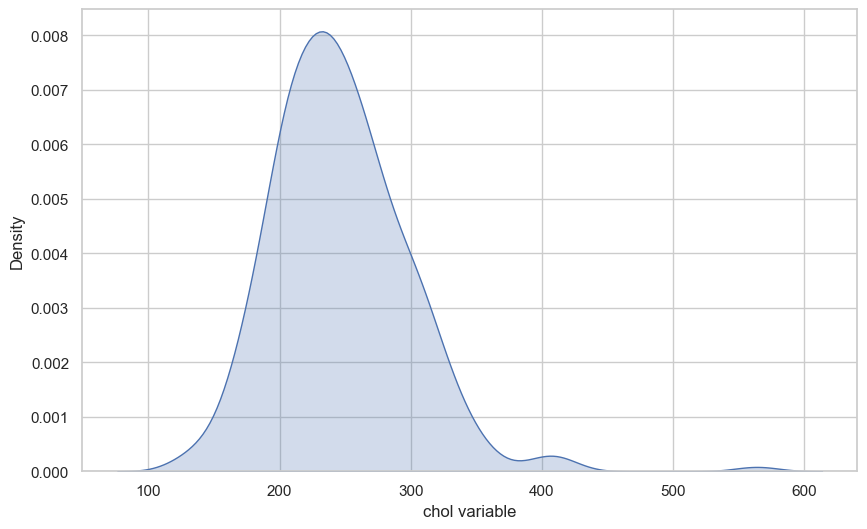

In [127]:
plt.subplots(figsize = (10, 6))
x = heart['chol']
x = pd.Series(x, name = 'chol variable')
a = sns.kdeplot(x, shade = True)
plt.show()

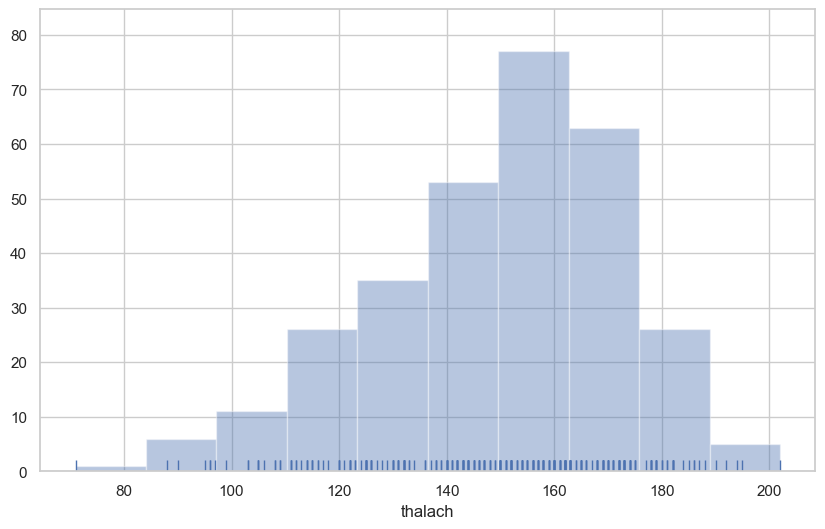

In [129]:
plt.subplots(figsize = (10, 6))
x = heart['thalach']
a = sns.distplot(x, kde = False, rug = True, bins = 10)
plt.show()

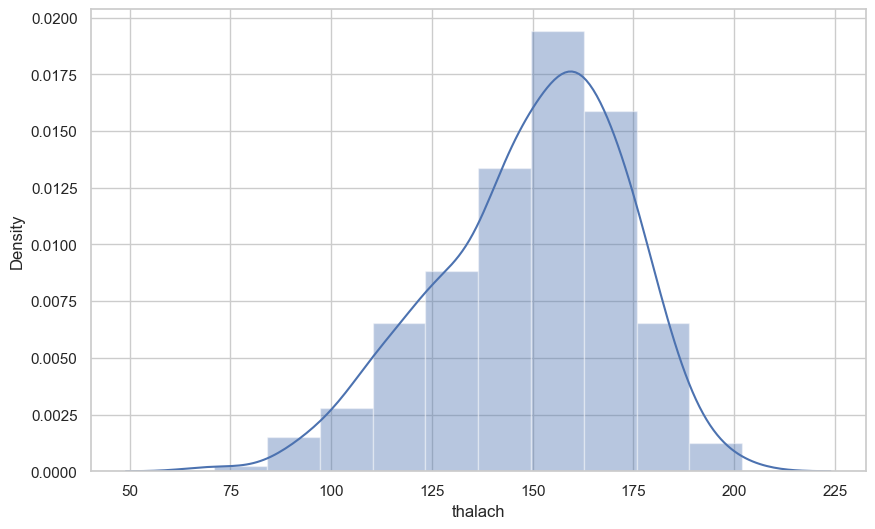

In [131]:
plt.subplots(figsize = (10, 6))
x = heart['thalach']
a = sns.distplot(x, kde = True, rug = False, bins = 10)
plt.show()

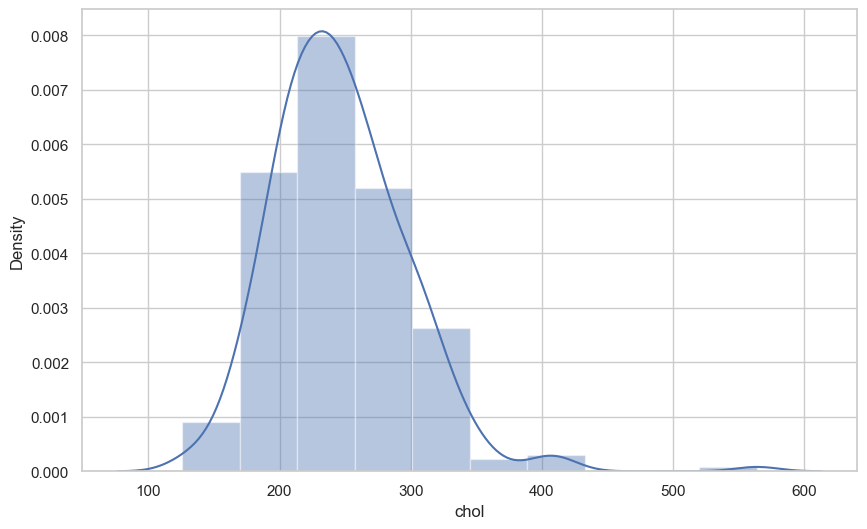

In [133]:
plt.subplots(figsize = (10, 6))
x = heart['chol']
a = sns.distplot(x, kde = True, rug = False, bins = 10)
plt.show()

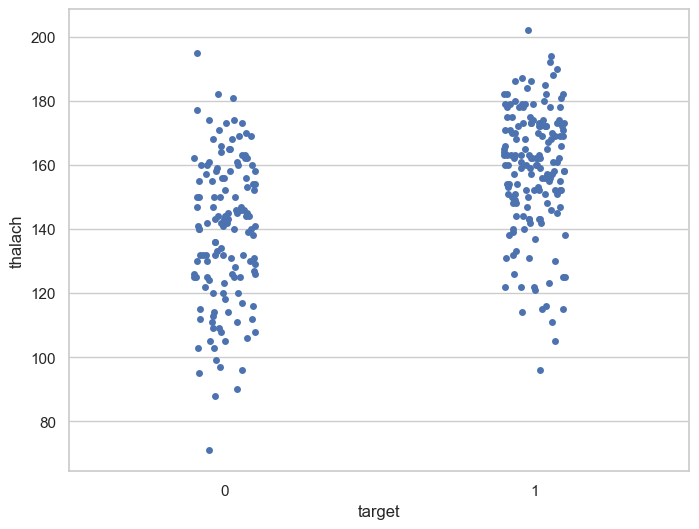

In [135]:
plt.subplots(figsize = (8, 6))
a = sns.stripplot(heart, x = 'target', y = 'thalach')
plt.show()

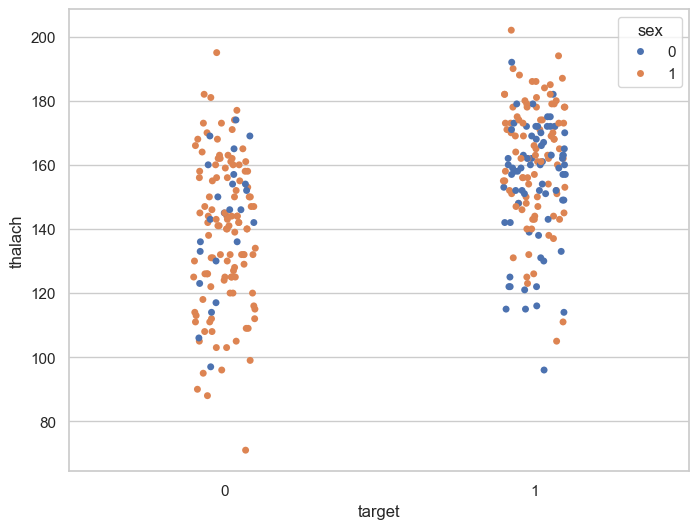

In [137]:
plt.subplots(figsize = (8, 6))
a = sns.stripplot(heart, x = 'target', y = 'thalach', hue = 'sex')
plt.show()

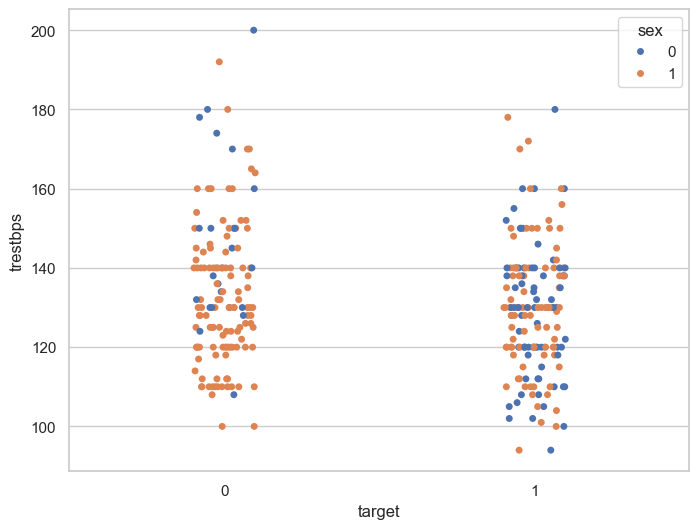

In [139]:
plt.subplots(figsize = (8, 6))
a = sns.stripplot(heart, x = 'target', y = 'trestbps', hue = 'sex')
plt.show()

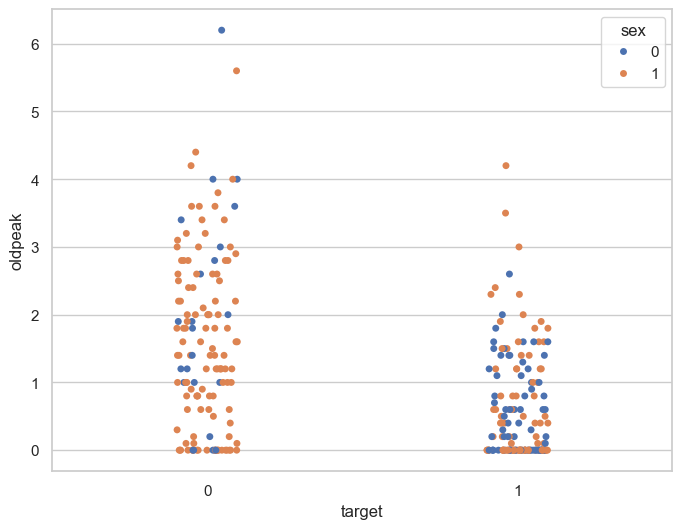

In [141]:
plt.subplots(figsize = (8, 6))
a = sns.stripplot(heart, x = 'target', y = 'oldpeak', hue = 'sex')
plt.show()

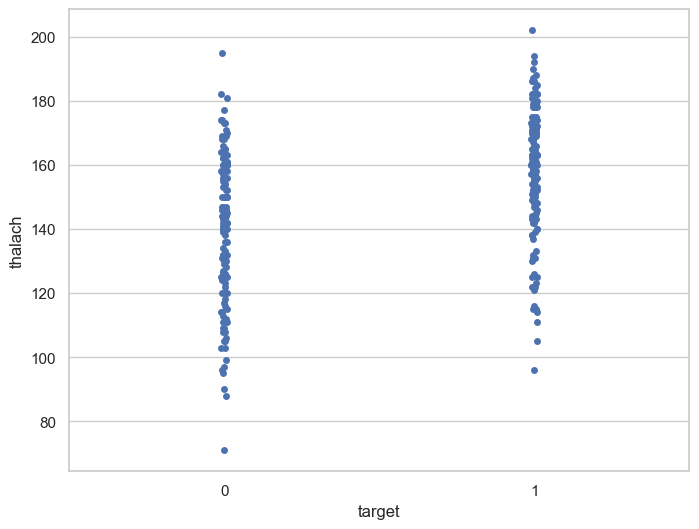

In [143]:
plt.subplots(figsize = (8, 6))
sns.stripplot(heart, x = 'target', y = 'thalach', jitter = 0.01)
plt.show()

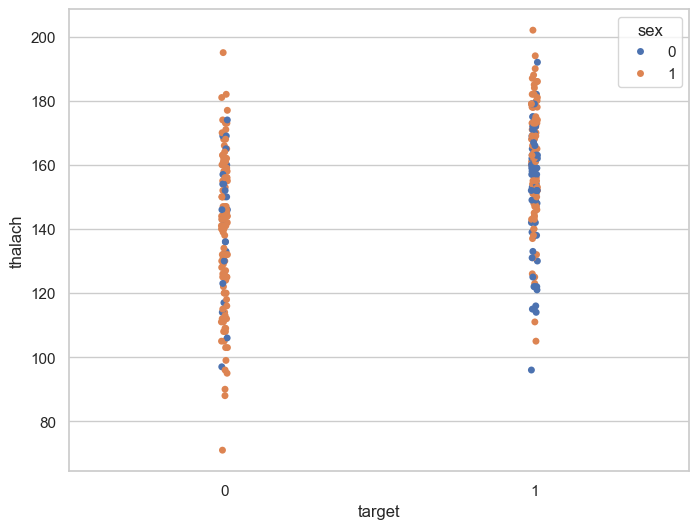

In [145]:
plt.subplots(figsize = (8, 6))
sns.stripplot(heart, x = 'target', y = 'thalach', hue = 'sex', jitter = 0.01)
plt.show()

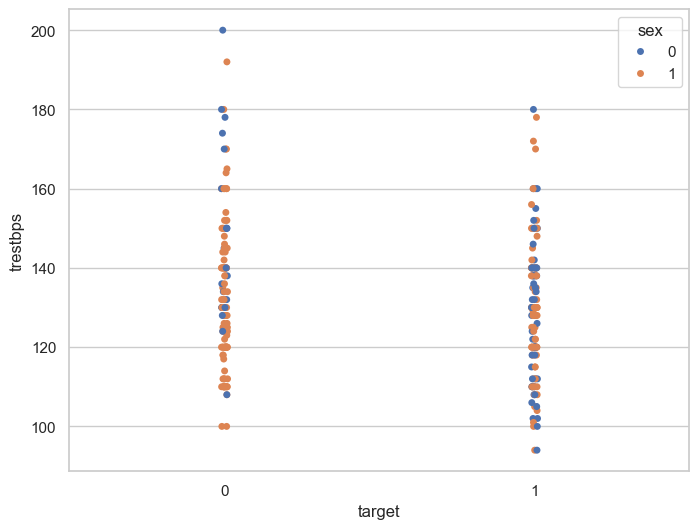

In [147]:
plt.subplots(figsize = (8, 6))
sns.stripplot(heart, x = 'target', y = 'trestbps', hue = 'sex', jitter = 0.01)
plt.show()

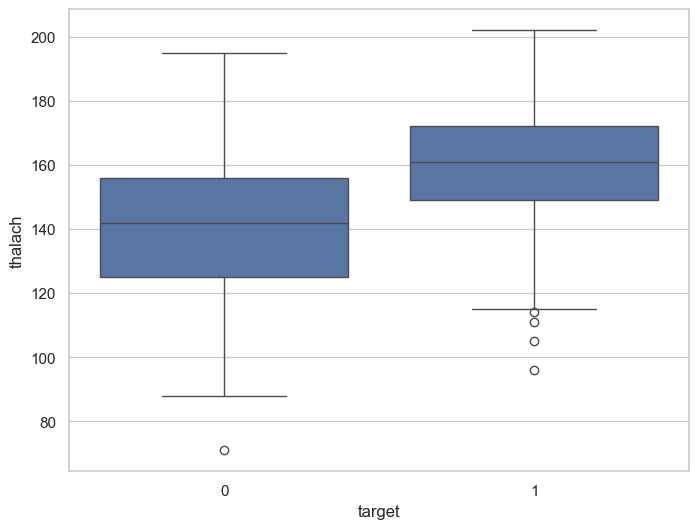

In [149]:
plt.subplots(figsize = (8, 6))
sns.boxplot(heart, x = 'target', y = 'thalach')
plt.show()

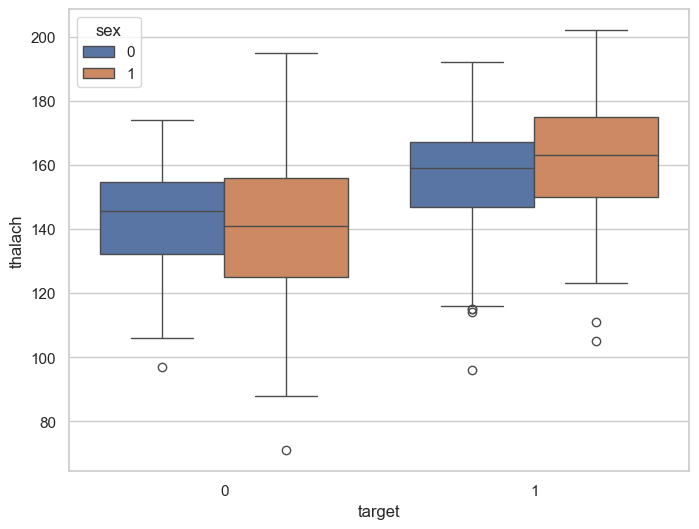

In [151]:
plt.subplots(figsize = (8, 6))
sns.boxplot(heart, x = 'target', y = 'thalach', hue = 'sex')
plt.show()

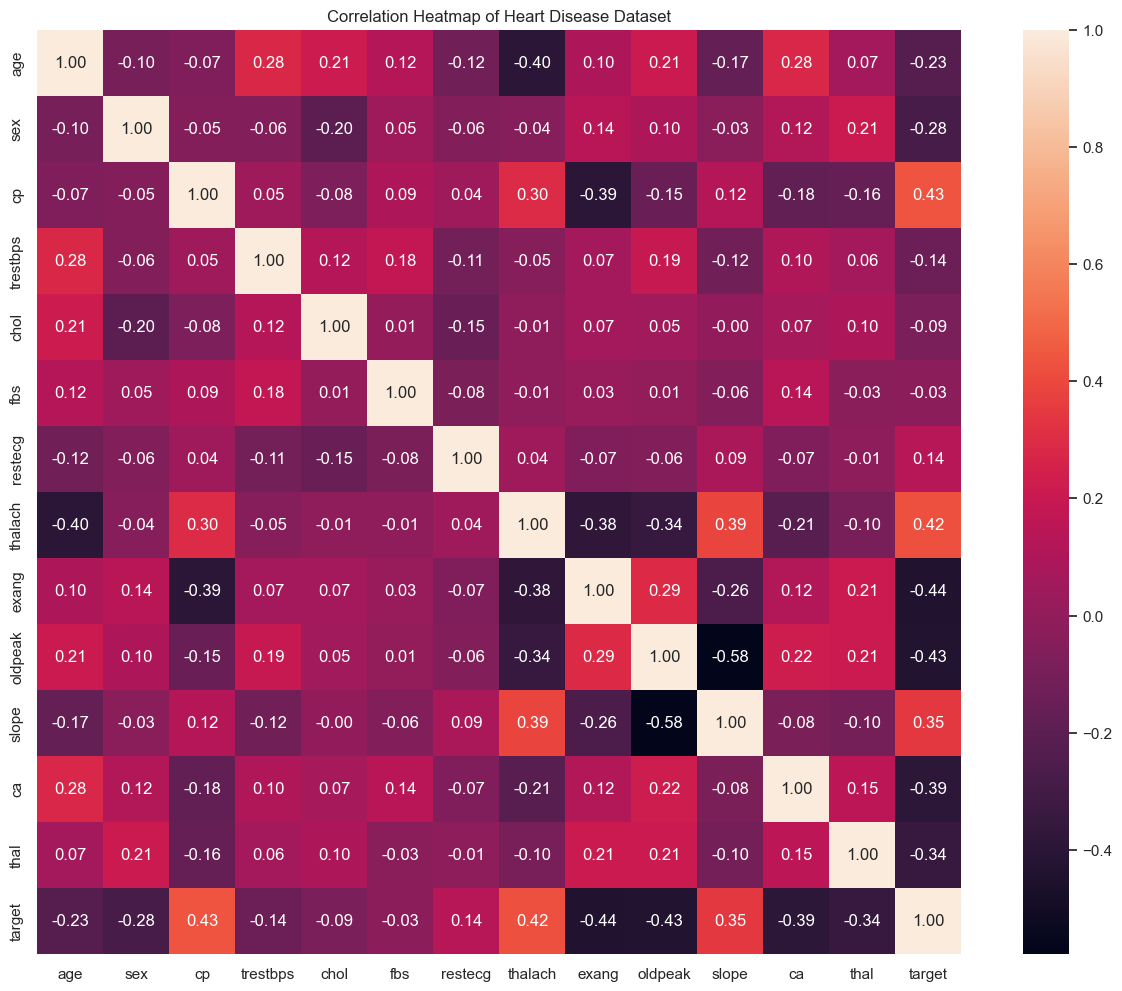

In [155]:
plt.figure(figsize = (16,12))
plt.title('Correlation Heatmap of Heart Disease Dataset')
a = sns.heatmap(correlation, square = True, annot = True, fmt = '.2f', linecolor = 'white')
plt.show()

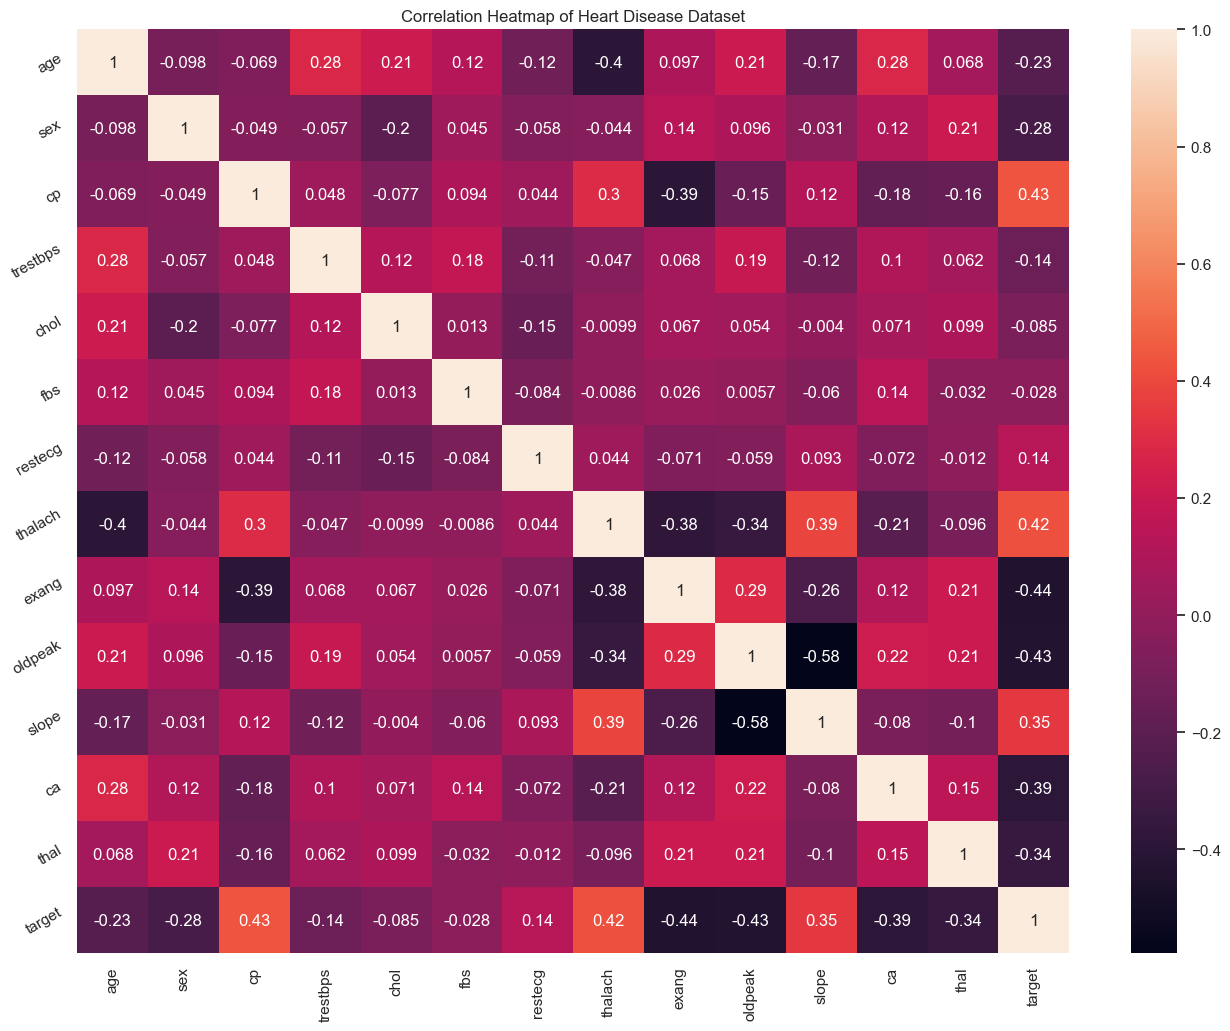

In [157]:
plt.figure(figsize = (16,12))
plt.title('Correlation Heatmap of Heart Disease Dataset')
a = sns.heatmap(correlation, annot = True, linecolor = 'white')
a.set_xticklabels(a.get_xticklabels(), rotation = 90)
a.set_yticklabels(a.get_yticklabels(), rotation = 30)
plt.show()

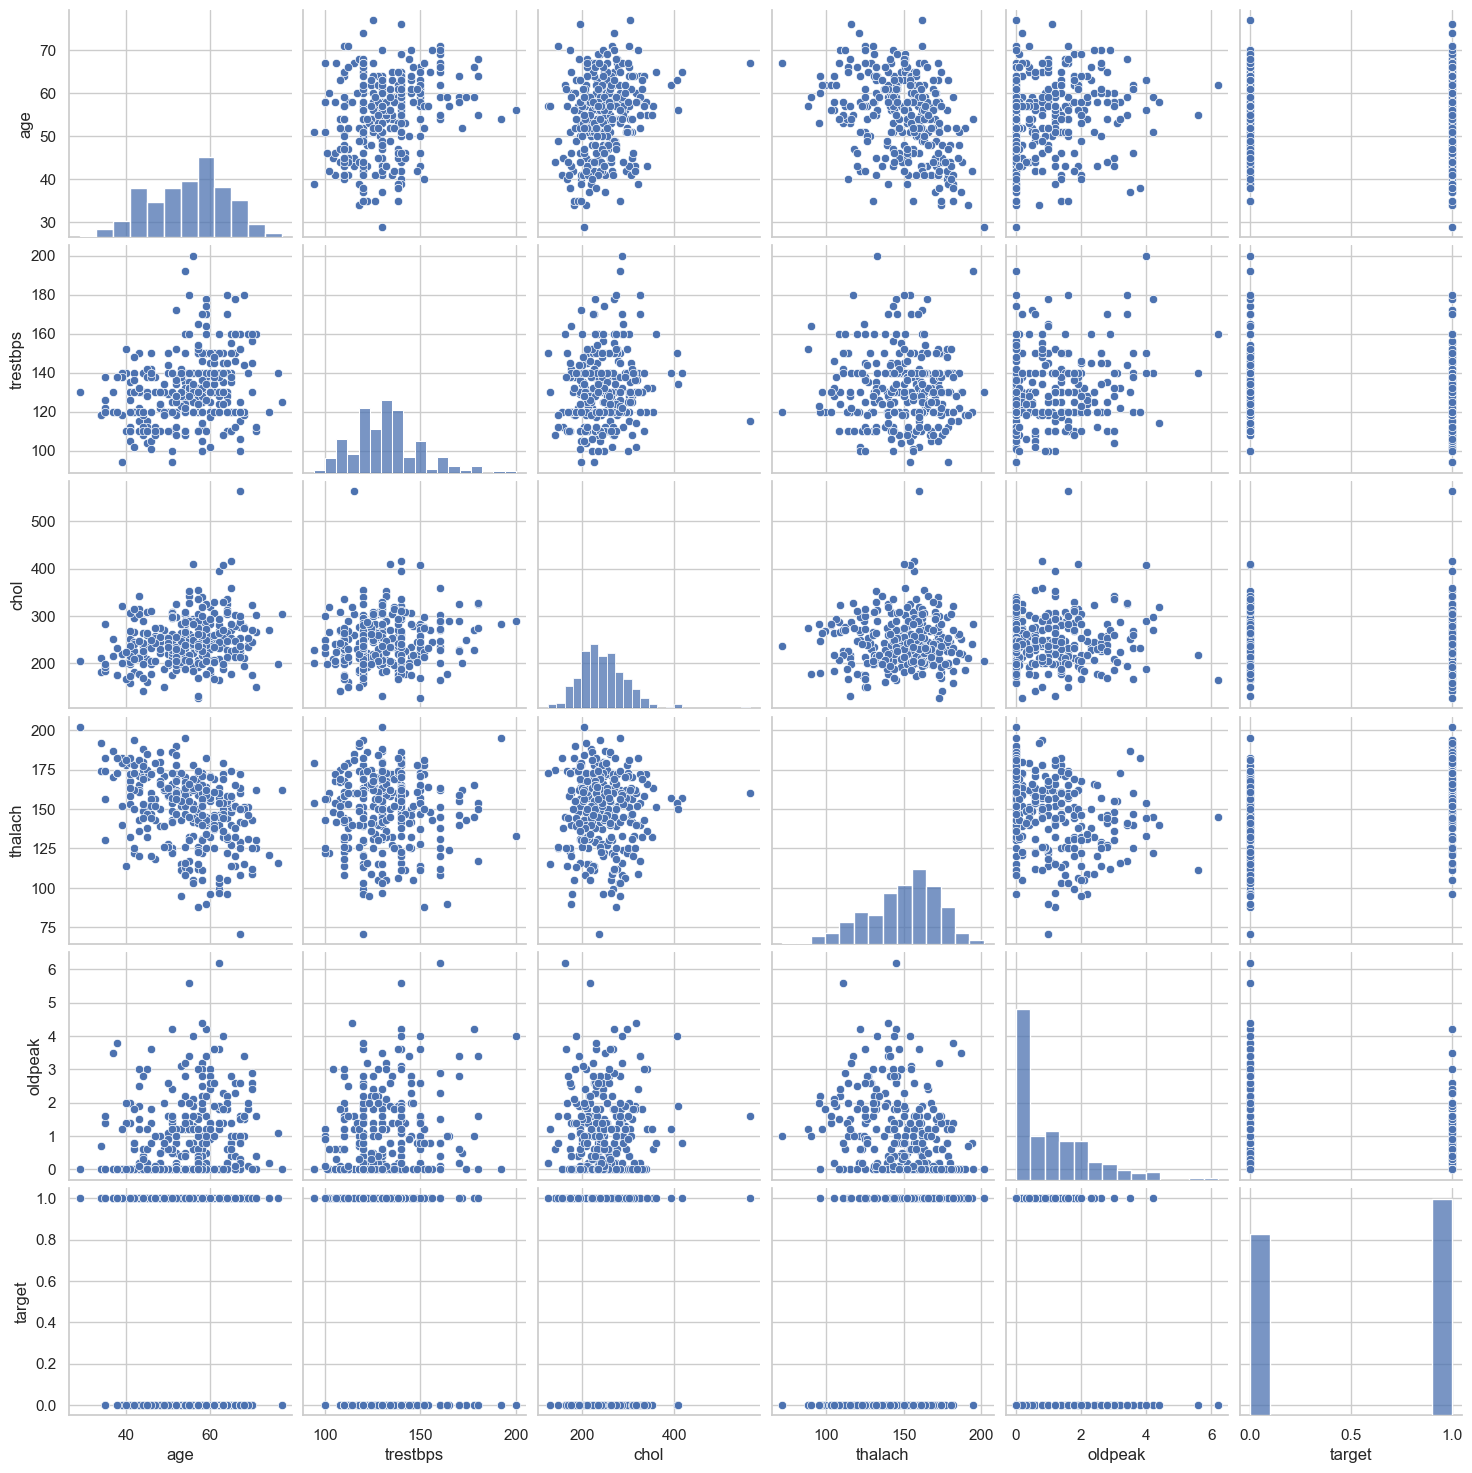

In [159]:
num_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
sns.pairplot(heart[num_var], kind = 'scatter', diag_kind = 'hist')
plt.show()

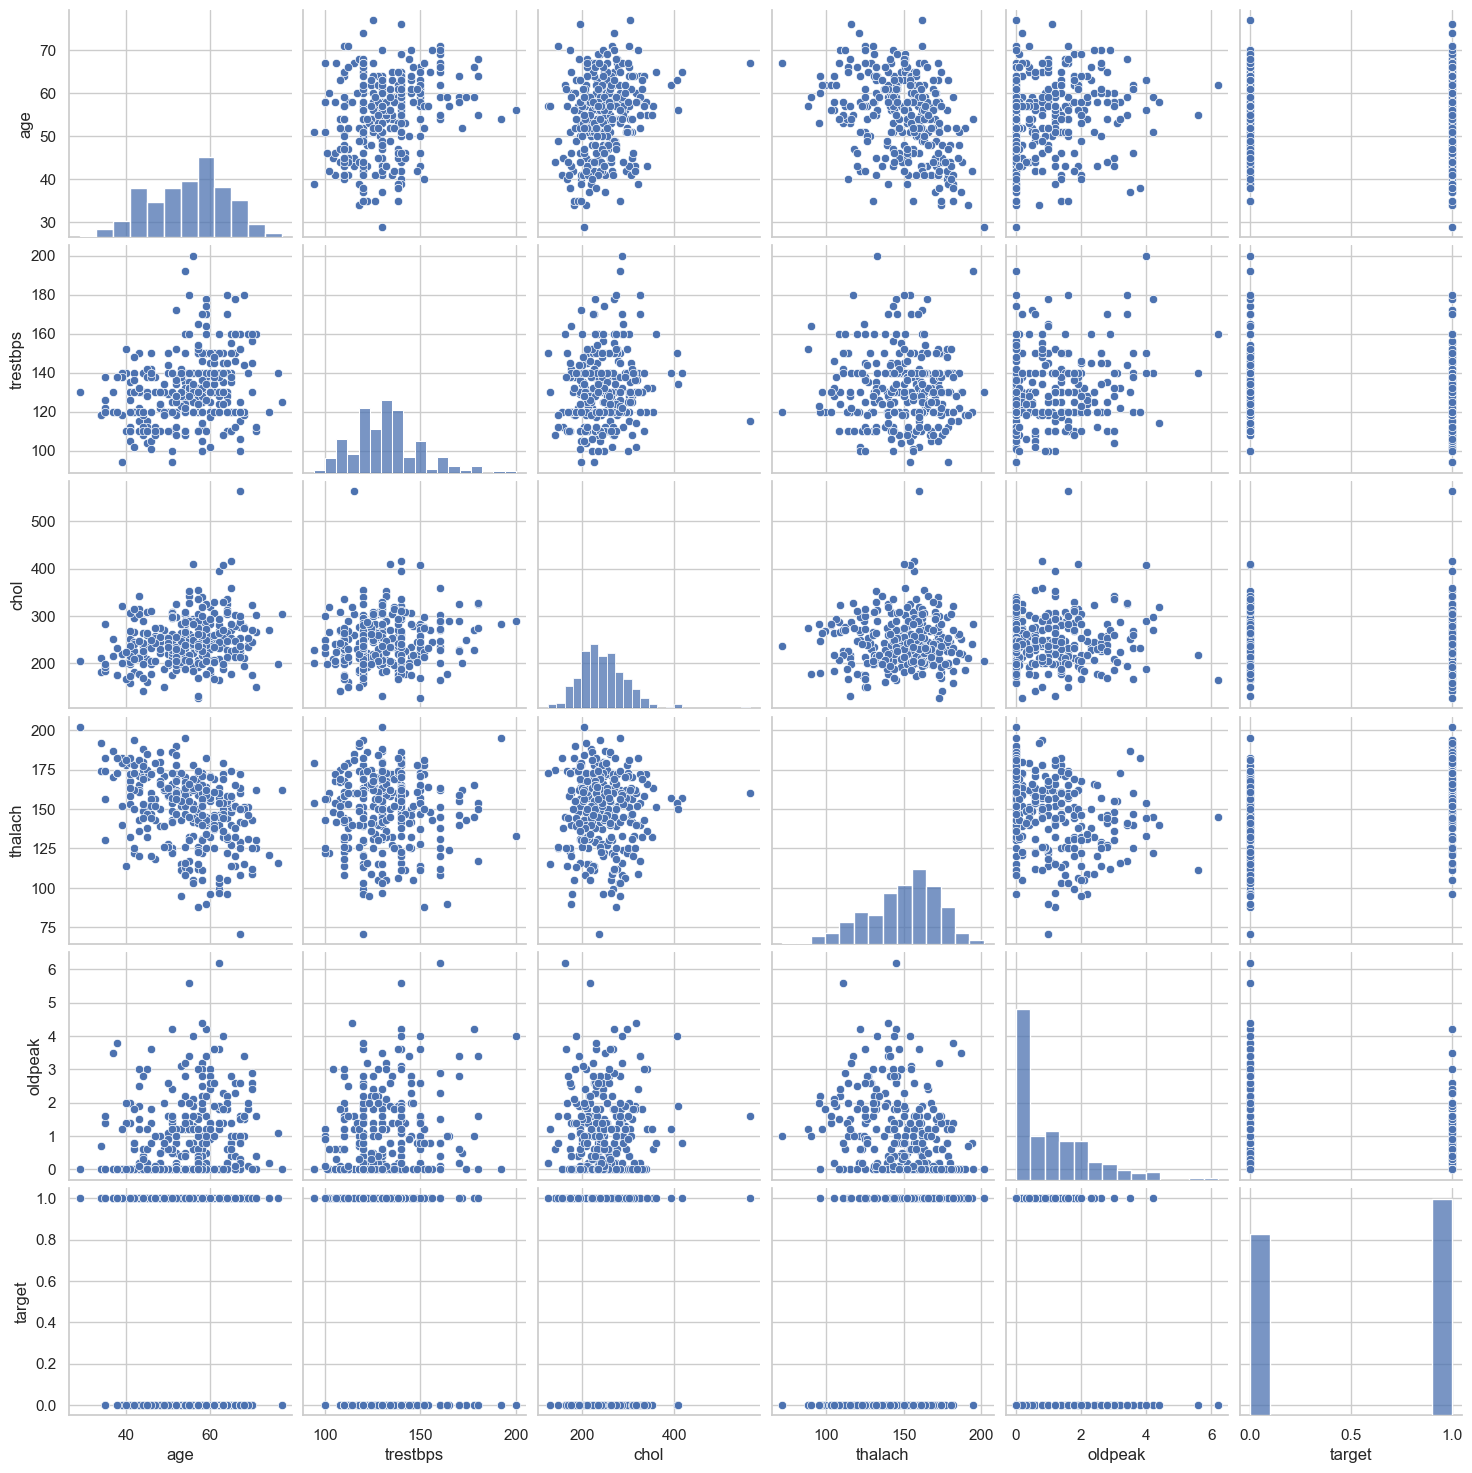

In [161]:
num_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
sns.pairplot(heart[num_var], kind = 'scatter', diag_kind = 'hist')
plt.show()

In [163]:
heart['age'].nunique()

41

In [165]:
heart['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

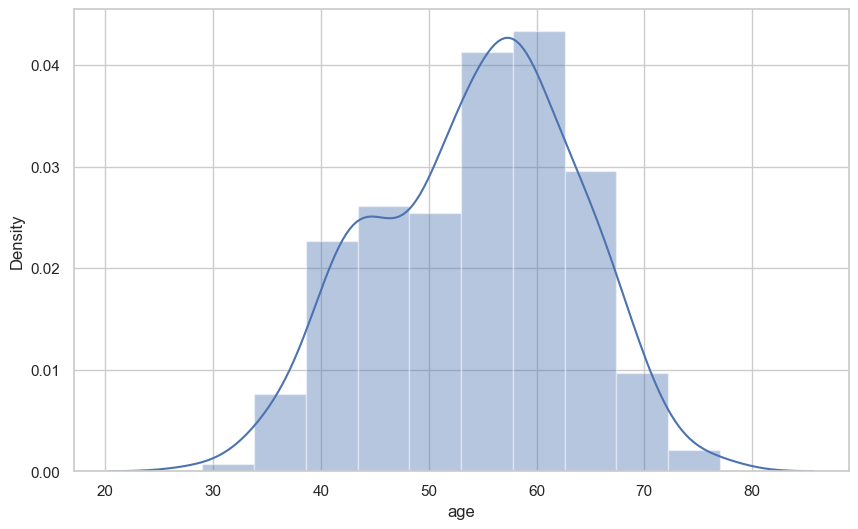

In [167]:
plt.subplots(figsize = (10, 6))
x = heart['age']
ax = sns.distplot(x, bins = 10)
plt.show()

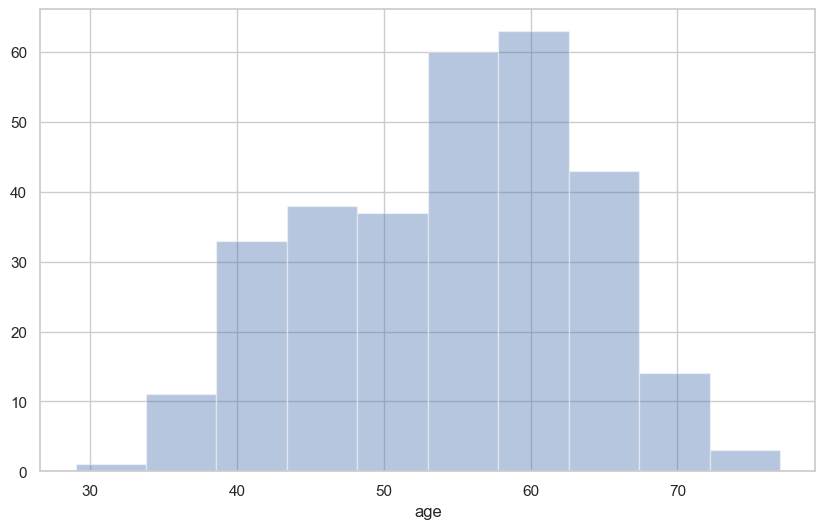

In [169]:
plt.subplots(figsize = (10, 6))
x = heart['age']
ax = sns.distplot(x, kde = False,bins = 10)
plt.show()

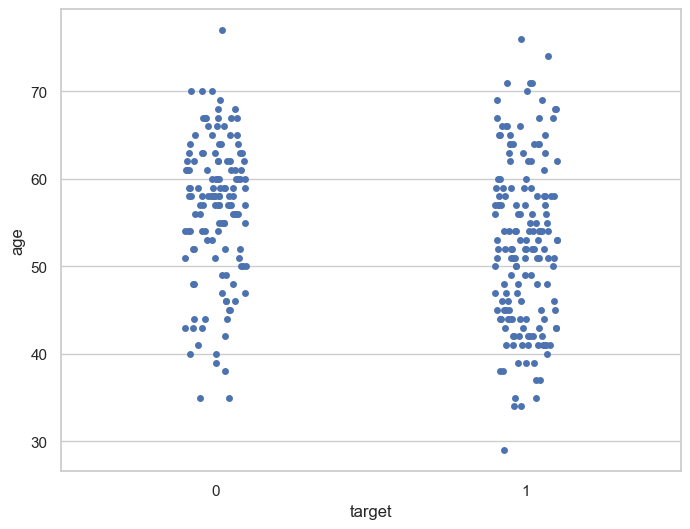

In [171]:
plt.subplots(figsize = (8, 6))
sns.stripplot(heart, x = 'target', y = 'age')
plt.show()

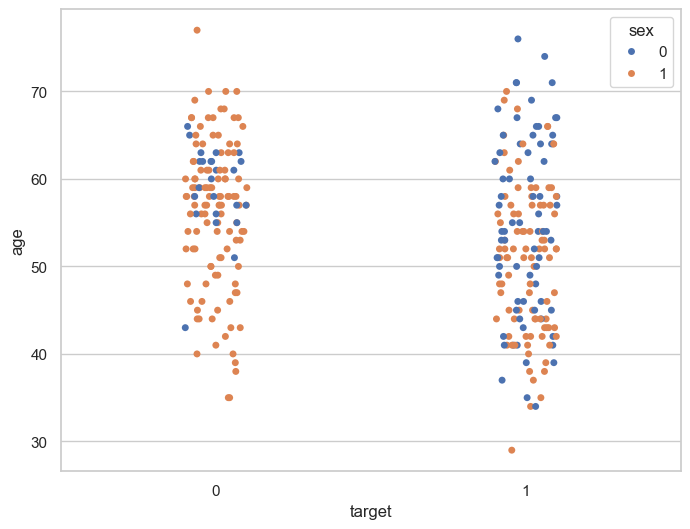

In [173]:
plt.subplots(figsize = (8, 6))
sns.stripplot(heart, x = 'target', y = 'age', hue = 'sex')
plt.show()

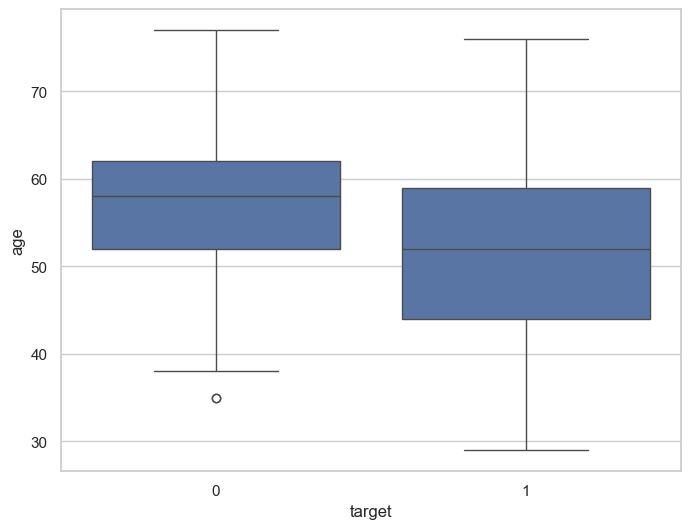

In [175]:
plt.subplots(figsize = (8, 6))
sns.boxplot(heart, x = 'target', y = 'age')
plt.show()

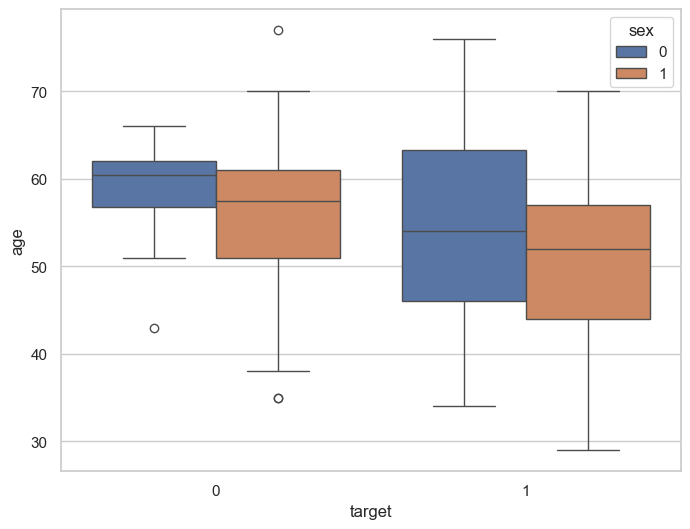

In [177]:
plt.subplots(figsize = (8, 6))
sns.boxplot(heart, x = 'target', y = 'age', hue = 'sex')
plt.show()

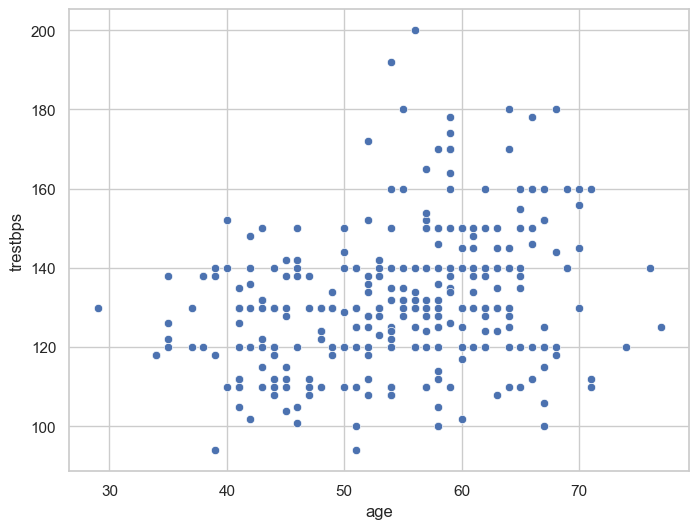

In [179]:
plt.subplots(figsize = (8, 6))
sns.scatterplot(heart, x = 'age', y = 'trestbps')
plt.show()

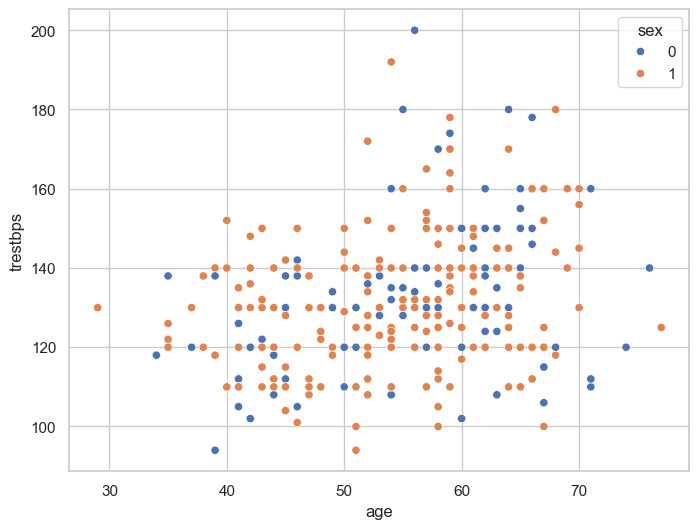

In [181]:
plt.subplots(figsize = (8, 6))
sns.scatterplot(heart, x = 'age', y = 'trestbps', hue = 'sex')
plt.show()

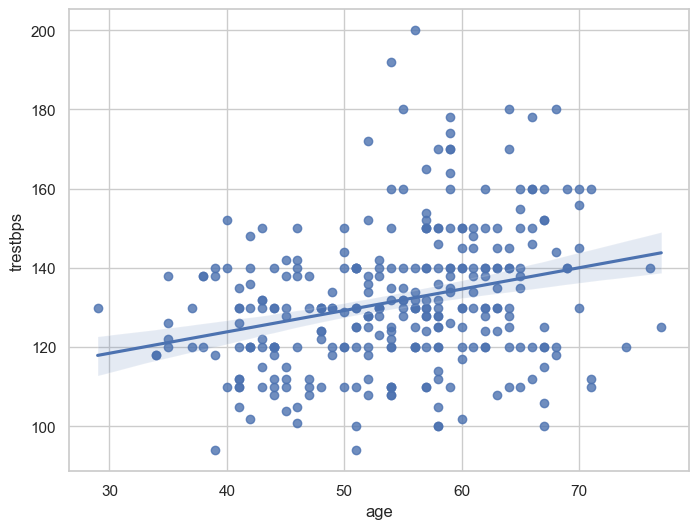

In [183]:
plt.subplots(figsize = (8, 6))
sns.regplot(heart, x = 'age', y = 'trestbps')
plt.show()

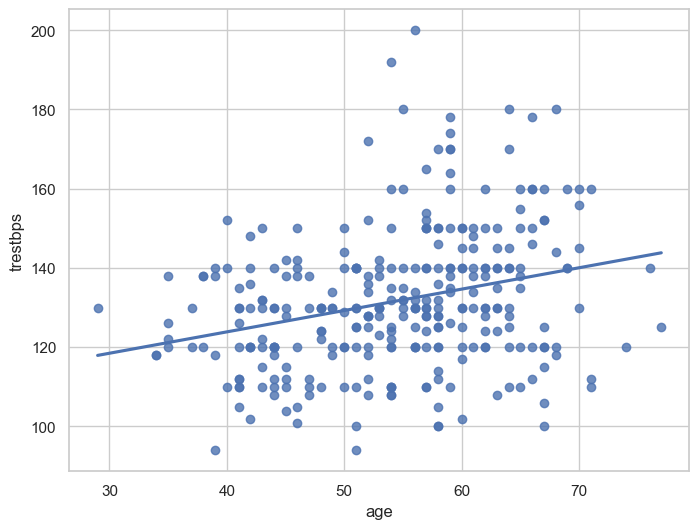

In [185]:
plt.subplots(figsize = (8, 6))
sns.regplot(heart, x = 'age', y = 'trestbps', ci = None)
plt.show()

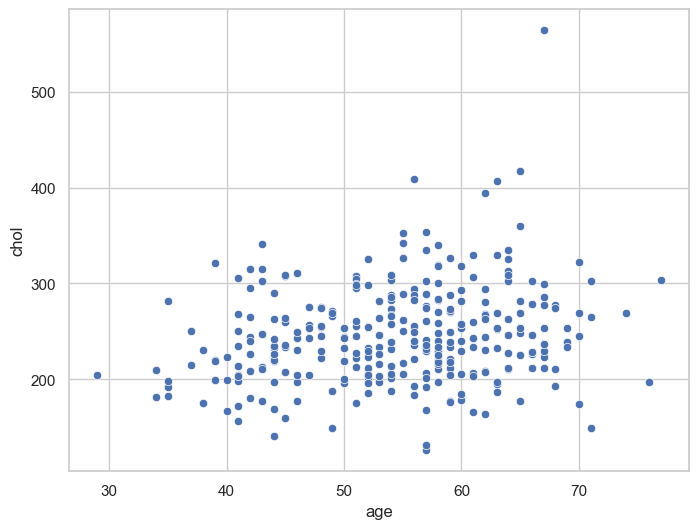

In [187]:
plt.subplots(figsize = (8, 6))
sns.scatterplot(heart, x = 'age', y = 'chol')
plt.show()

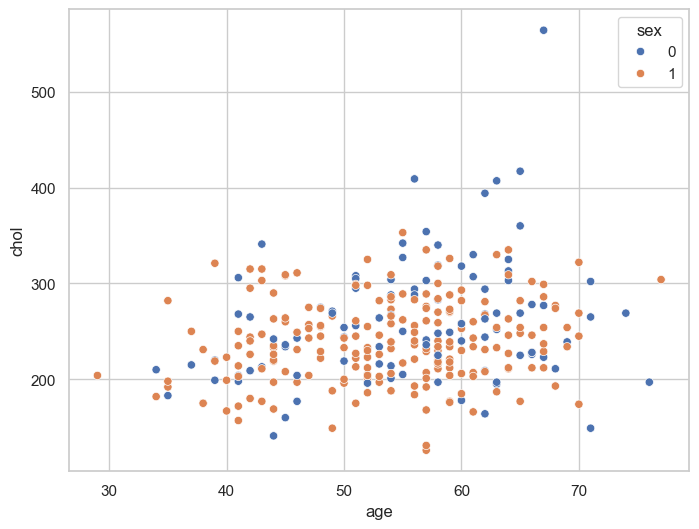

In [189]:
plt.subplots(figsize = (8, 6))
sns.scatterplot(heart, x = 'age', y = 'chol', hue = 'sex')
plt.show()

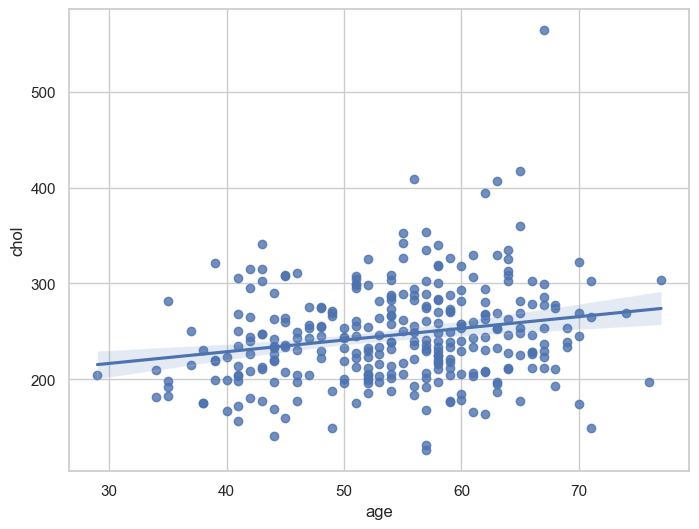

In [191]:
plt.subplots(figsize = (8, 6))
sns.regplot(heart, x = 'age', y = 'chol')
plt.show()

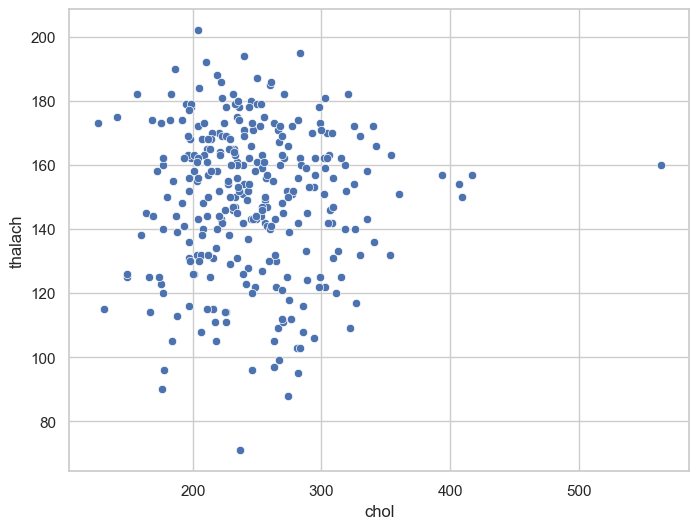

In [193]:
plt.subplots(figsize = (8, 6))
sns.scatterplot(heart, x = 'chol', y = 'thalach')
plt.show()

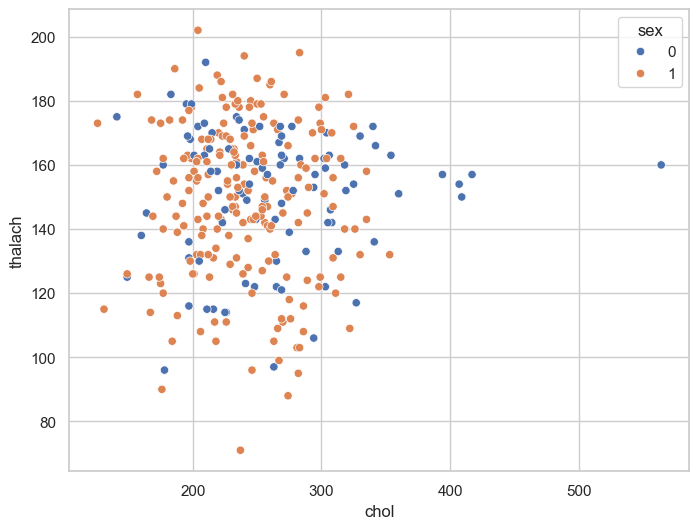

In [195]:
plt.subplots(figsize = (8, 6))
sns.scatterplot(heart, x = 'chol', y = 'thalach', hue = 'sex')
plt.show()

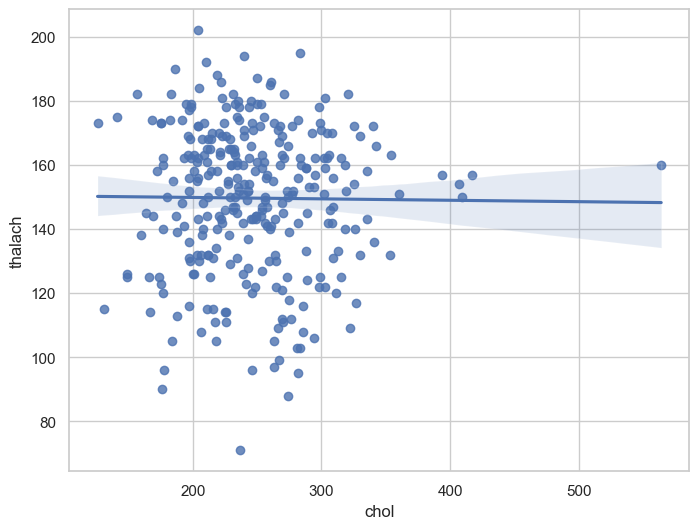

In [197]:
plt.subplots(figsize = (8, 6))
sns.regplot(heart, x = 'chol', y = 'thalach')
plt.show()

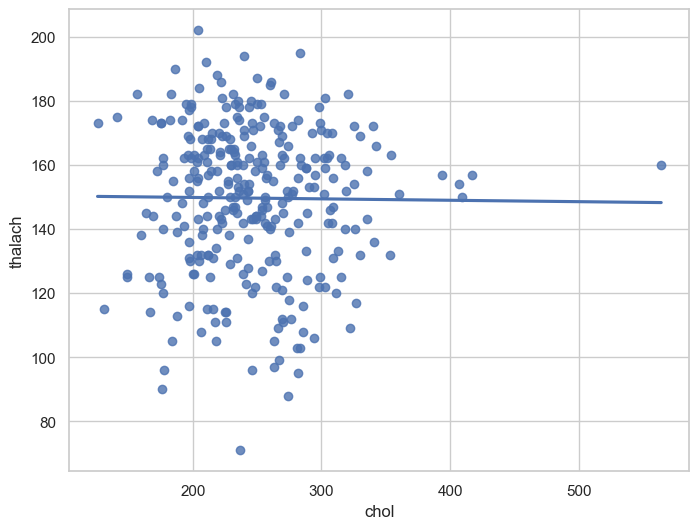

In [199]:
plt.subplots(figsize = (8, 6))
sns.regplot(heart, x = 'chol', y = 'thalach', ci = None)
plt.show()

In [201]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [203]:
 # there are no missing values in dataframe
assert pd.notnull(heart).all().all()

In [205]:
# all values are greater than or equal to 0
assert (heart >= 0).all().all()

In [207]:
heart['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

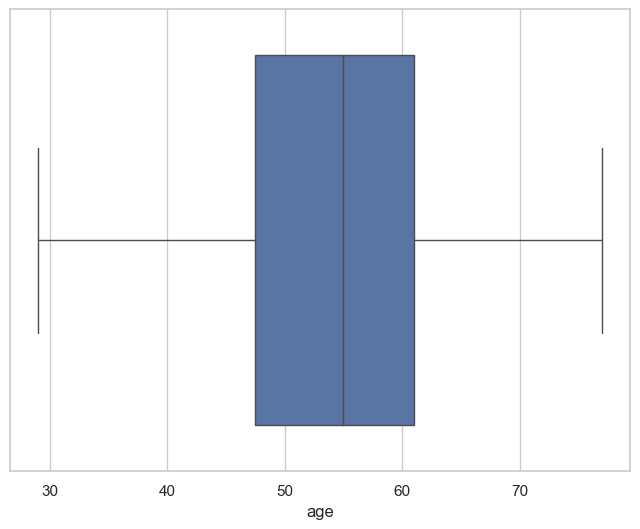

In [209]:
plt.subplots(figsize = (8, 6))
sns.boxplot(x = heart['age'])
plt.show()

In [211]:
heart['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

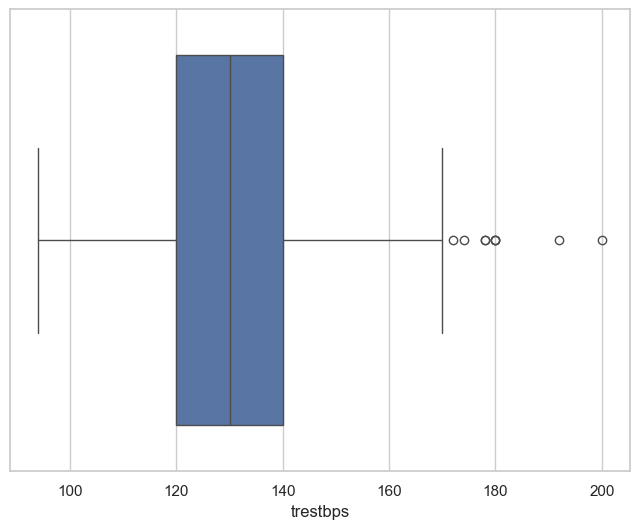

In [213]:
plt.subplots(figsize = (8, 6))
sns.boxplot(x = heart['trestbps'])
plt.show()

In [215]:
heart['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

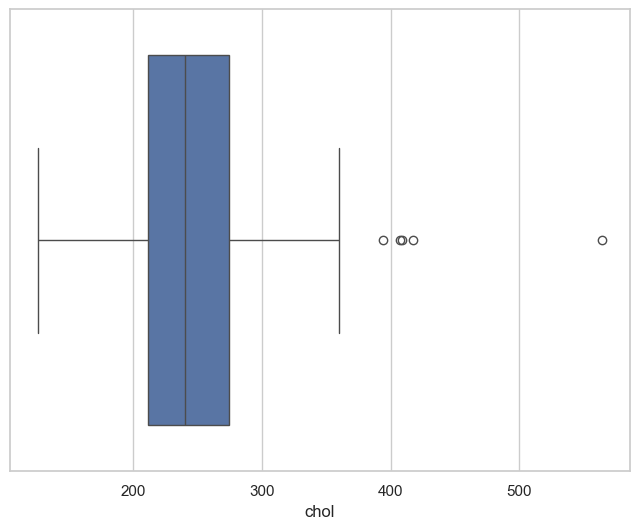

In [217]:
plt.subplots(figsize = (8, 6))
sns.boxplot(x = heart['chol'])
plt.show()

In [219]:
heart['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

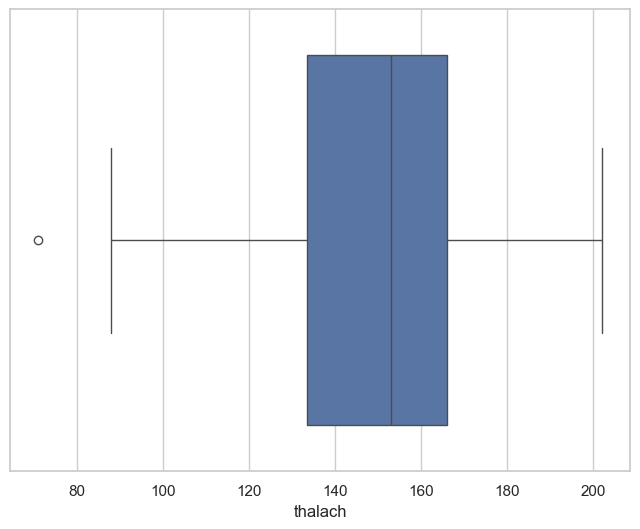

In [221]:
plt.subplots(figsize = (8, 6))
sns.boxplot(x = heart['thalach'])
plt.show()

In [223]:
heart['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

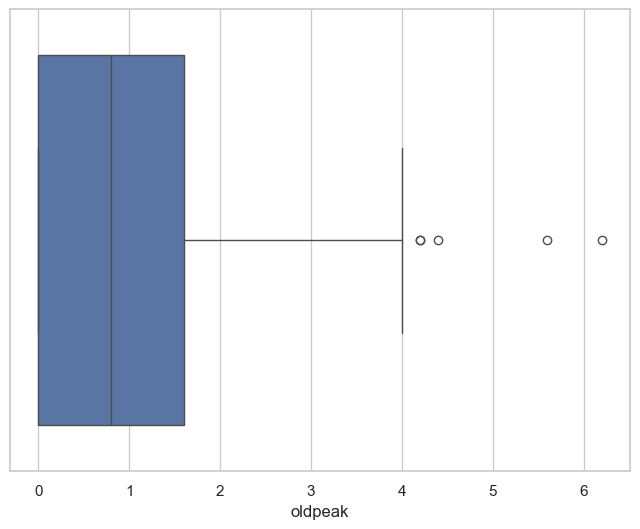

In [225]:
plt.subplots(figsize = (8, 6))
sns.boxplot(x = heart['oldpeak'])
plt.show()